Following this article https://medium.com/@martinpella/customers-tweets-classification-41cdca4e2de

Data came from here https://www.kaggle.com/crowdflower/twitter-airline-sentiment/data

## Clean dataset

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("white");
sns.set_palette("tab10")

import warnings; warnings.simplefilter('ignore')

In [2]:
df_tweets = pd.read_csv('data/twitter-airline-sentiment.csv')
df_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


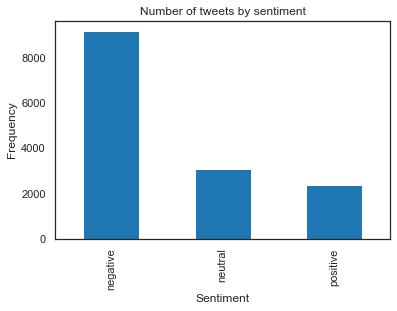

In [3]:
ax = df_tweets['airline_sentiment'].value_counts().plot(kind='bar', 
                                    title="Number of tweets by sentiment")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Frequency")
plt.show()

In [4]:
import re

df_clean = df_tweets[['text', 'airline_sentiment']]

# clean mentions
df_clean.text = df_clean.text.apply(lambda x: re.sub(r'@\w+', '', x))

# clean URLs
df_clean.text = df_clean.text.apply(lambda x: re.sub(r'http.?://[^\s]+[\s]?', '', x))

# remove symbols and digits
df_clean.text = df_clean.text.apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))

# remove extra white spaces
df_clean.text = df_clean.text.apply(lambda x: re.sub("\s+", ' ', x))
df_clean.text = df_clean.text.apply(lambda x: x.lstrip())
df_clean.text = df_clean.text.apply(lambda x: x.rstrip())

# make lowercase
df_clean.text = df_clean.text.apply(lambda x: x.lower())

# # clean up words
# text = re.sub(r'\bcudtomers\b', 'customers', text)
# text = re.sub(r'\bppl\b', 'people', text)
# text = re.sub(r'\basap\b', 'as soon as possible', text)
# text = re.sub(r'\biphone\b', 'phone', text)

# fix words
df_clean.text.head()

C:\Users\MMOW\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0                                            what said
1    plus youve added commercials to the experience...
2    i didnt today must mean i need to take another...
3    its really aggressive to blast obnoxious enter...
4              and its a really big bad thing about it
Name: text, dtype: object

In [31]:
# tokenize words - don't use the article's way because it's lame
# https://stackoverflow.com/questions/4867197/failed-loading-english-pickle-with-nltk-data-load
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_clean['tokenized_text'] = df_clean.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df_clean.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MMOW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\MMOW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,text,airline_sentiment,tokenized_text
0,what said,neutral,"[what, said]"
1,plus youve added commercials to the experience...,positive,"[plus, youve, added, commercials, to, the, exp..."
2,i didnt today must mean i need to take another...,neutral,"[i, didnt, today, must, mean, i, need, to, tak..."
3,its really aggressive to blast obnoxious enter...,negative,"[its, really, aggressive, to, blast, obnoxious..."
4,and its a really big bad thing about it,negative,"[and, its, a, really, big, bad, thing, about, it]"


In [41]:
# this takes forever to run
from nltk.corpus import stopwords
 
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
stopWords = set(stopwords.words('english'))
data = df_clean['tokenized_text']

counter = 0
for row in data:
    counter += 1
    wordsFiltered = []
    for word in row:
        if word not in stopWords:
            wordsFiltered.append(word)
    
    df_clean.tokenized_text[counter-1] = wordsFiltered
    #print(wordsFiltered)

['said']
['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']
['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guests', 'faces', 'amp', 'little', 'recourse']
['really', 'big', 'bad', 'thing']
['seriously', 'would', 'pay', 'flight', 'seats', 'didnt', 'playing', 'really', 'bad', 'thing', 'flying', 'va']
['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'wont', 'go', 'away']
['really', 'missed', 'prime', 'opportunity', 'men', 'without', 'hats', 'parody']
['well', 'didntbut']
['amazing', 'arrived', 'hour', 'early', 'youre', 'good']
['know', 'suicide', 'second', 'leading', 'cause', 'death', 'among', 'teens']
['lt', 'pretty', 'graphics', 'much', 'better', 'minimal', 'iconography']
['great', 'deal', 'already', 'thinking', 'nd', 'trip', 'amp', 'havent', 'even', 'gone', 'st', 'trip', 'yet', 'p']
['im', 'flying', 'fabulous', 'seductive', 'skies', 'u', 'take', 'stress', 'away', 'travel']

['absolute', 'best', 'team', 'customer', 'service', 'ever', 'every', 'time', 'fly', 'im', 'delighted', 'thank']
['provide', 'complimentary', 'upgrades', 'first', 'class', 'available', 'seats']
['need', 'change', 'flight', 'thats', 'scheduled', 'hours', 'min', 'wait', 'time', 'phone', 'im', 'calling', 'intern', 'help']
['completely', 'awesome', 'experience', 'last', 'month', 'boslas', 'nonstop', 'thanks', 'awesome', 'flight', 'depart', 'time', 'vabeatsjblue']
['watch', 'oscars', 'jfkgtsfo', 'flight']
['flight', 'cancelled', 'flightled']
['failing', 'customers', 'check', 'process', 'link', 'tsa', 'precheck']
['us', 'terrible', 'airline', 'gave', 'us', 'hotel', 'hotline', 'number', 'said', 'sorry']
['flight', 'number', 'sfo', 'cabo', 'san', 'lucas', 'arrived', 'yet']
['assistance', 'yesterday', 'u', 'cancelled', 'flightled', 'flight', 'give', 'us', 'hotel', 'hotline', 'shame']
['another', 'delayed', 'flight', 'likingyoulessandless']
['need', 'register', 'service', 'dog', 'first', 'class',

['todays', 'flight', 'palm', 'springs', 'ca', 'jfk', 'ny', 'cancelled', 'flightled']
['hahaha', 'guys', 'amazing', 'love', 'guys']
['sounds', 'like', 'fun']
['updates', 'flight', 'jfk', 'gt', 'lax']
['spruce', 'moose']
['css', 'site', 'right', 'please', 'fix', 'site', 'unusable']
['flight', 'vegas', 'boston', 'today', 'checked', 'online', 'bag', 'count', 'didnt', 'register', 'fix', 'somehow']
['classiq', 'luv', 'virgin', 'america', 'greetingz']
['hi', 'im', 'trying', 'checkin', 'website', 'working', 'tried', 'different', 'browsers', 'problem', 'continues']
['thanks', 'great', 'customer', 'service', 'today', 'amp', 'helping', 'get', 'travel', 'sorted']
['thanks', 'guys', 'sweet', 'route', 'rockies', 'airplanemodewason']
['love', 'music', 'blasting', 'gate', 'boston', 'waiting', 'flight', 'sanfrancisco', 'could', 'get', 'iced', 'coffee']
['passenger', 'flt', 'assaulted', 'shouldnt', 'flown', 'trust', 'hes', 'banned', 'crew', 'filed', 'report']
['current', 'bug', 'website', 'shows', 'sele

['brilliant', 'brisk', 'boston', 'cue', 'vx']
['atlantic', 'ploughs', 'lone', 'furrow', 'middleeast']
['atlantic', 'ploughs', 'lone', 'furrow', 'middleeast']
['atlantic', 'ploughs', 'lone', 'furrow', 'middleeast']
['omg', 'omg', 'nonstop', 'dallas', 'austin', 'virgin']
['planes', 'really', 'pretty', 'thought', 'u', 'know']
['flying', 'hawaii']
['im', 'pulling', 'hair', 'trying', 'book', 'flight', 'u', 'site', 'doesnt', 'work', 'iphone', 'ipaddont', 'computer', 'help']
['thank']
['get', 'help', 'support', 'ticket', 'days', 'incident', 'thank']
['good', 'home', 'texas', 'moodlighting']
['even', 'open', 'laptop', 'seat', 'c', 'paid', 'premium', 'let']
['seat', 'c', 'even', 'open', 'laptop', 'paid', 'extra', 'seat']
['guys', 'starting', 'flights', 'end', 'month', 'guess', 'im', 'still', 'road', 'tripping', 'feb']
['thanks', 'needing', 'way', 'make', 'austin', 'trips', 'dca', 'youve', 'come']
['announced', 'new', 'route', 'austin', 'wfares', 'way']
['really', 'sprint', 'thought', 'guys', 'k

['wanted', 'let', 'know', 'wonderful', 'rosetta', 'gate', 'agent', 'working', 'flight', 'dan', 'ase', 'let', 'know', 'wasappreciated']
['yes', 'paper', 'voucher', 'got', 'january', 'th']
['beginning', 'feb', 'called', 'united', 'said', 'would', 'send', 'another', 'voucher', 'mail', 'never', 'got', 'anything', 'tiredofwaiting']
['internet', 'great', 'thing', 'emailing', 'executives', 'company', 'maybe', 'respond', 'timely', 'manner']
['need', 'use', 'chase', 'united', 'club', 'pass', 'yr', 'old', 'son', 'come', 'pass']
['suppose', 'number']
['thats', 'weak', 'see', 'ya', 'hey']
['flew', 'back', 'w', 'company', 'since', 'united', 'didnt', 'earlier', 'flight']
['lost', 'voucher', 'given', 'miami', 'aeroport', 'jan', 'use']
['trying', 'book', 'awards', 'september', 'need', 'flights', 'show', 'even', 'w', 'many', 'award', 'seats', 'availab']
['sure', 'drive', 'total', 'hours', 'get', 'bag', 'id', 'like', 'explain', 'debacle', 'one', 'wants', 'talk']
['gee', 'thats', 'like', 'almost', 'carin

['someone', 'please', 'explain', 'process', 'happens', 'property', 'found', 'plane', 'passengers', 'leave', 'heathrow']
['able', 'dm', 'confirmation', 'number']
['ive', 'sent', 'message', 'let', 'know', 'got', 'im', 'twitterliterate', 'also', 'really', 'going', 'stuck', 'hrs']
['unhappy', 'response', 'complaint', 'emailed', 'nd', 'feb', 'ref', 'awful', 'customer', 'service']
['dm', 'work']
['private', 'jet', 'would', 'cool', 'work', 'ill', 'try']
['given', 'option', 'using', 'united', 'travelbank', 'recent', 'flight', 'booking', 'problems', 'help', 'using', 'recouping', 'funds', 'thanks']
['common', 'keep', 'paper', 'work', 'ready', 'dont', 'delay', 'flightsand', 'meetings']
['yulord']
['yep', 'thats', 'correct', 'got', 'email', 'flight', 'cancelled', 'flightled', 'doesnt', 'matter', 'flight', 'atl', 'delayed', 'thx']
['k', 'problem', 'getting', 'fll', 'iah', 'sent', 'dm', 'making', 'connection', 'please', 'let', 'know']
['done', 'done']
['thanks', 'sent']
['im', 'grounded', 'montreal'

['arriving', 'two', 'hours', 'late', 'flight', 'clt', 'sitting', 'tarmac', 'move', 'plane', 'gate', 'unhappy', 'customer']
['airlines', 'absolute', 'worst', 'idea', 'neveragain', 'unitedairlines']
['thanks', 'might', 'want', 'fix', 'line', 'customer', 'care', 'team', 'currently', 'responding', 'inquiries', 'within', 'business', 'days']
['flew', 'united', 'aus', 'austin', 'bergstrom', 'cancun', 'intl', 'best', 'flight', 'ever', 'big', 'small']
['frustrating', 'frequent', 'flyer', 'loyal', 'since', 'continental', 'upgrade', 'equals', 'paying', 'times', 'top', 'purchase', 'ticket']
['deep', 'vein', 'thrombosis']
['worse', 'cant', 'figure', 'pack', 'plane', 'screws', 'connectns', 'claims', 'hotl', 'rooms', 'san', 'fran', 'stranded', 'pax', 'way', 'go']
['passengers', 'hour', 'delayed', 'flight', 'left', 'hotel', 'end', 'night', 'hou', 'airport', 'wtf']
['hey', 'flight', 'iah', 'pos', 'leave', 'late', 'flight', 'one', 'back', 'iah', 'early', 'rather', 'get', 'pos', 'earlier']
['lost', 'bag'

['grkm', 'file', 'reference']
['wouldhow', 'contact', 'discuss', 'poor', 'experiences', 'customer', 'service', 'would', 'give', 'shot']
['ua', 'pacific', 'rim', 'date', 'night', 'cut', 'constantly', 'randomly', 'one', 'spot', 'repeatably']
['trying', 'since', 'file', 'report']
['send', 'email', 'bad', 'experience', 'send', 'back', 'generic', 'response', 'yet', 'another', 'reason', 'ill', 'never', 'fly']
['mom', 'left', 'kindle', 'flight', 'today', 'burgundy', 'case', 'light', 'seat', 'anyone', 'find']
['ticket', 'please', 'refund', 'unnecessary', 'upgrade', 'fee']
['horrible', 'lost', 'carseat', 'expect', 'us', 'use', 'loner', 'carseat', 'safety', 'regulations', 'say', 'illegal', 'use', 'used', 'car', 'seat']
['thank']
['decisions', 'decisions', 'wed', 'love', 'try', 'service', 'offer', 'status', 'match', 'kp']
['need', 'info', 'great', 'amenity', 'kits', 'pjs', 'included', 'status', 'match', 'aa', 'kp']
['dont', 'care', 'link', 'showed', 'wrong', 'price', 'siteits', 'site', 'amp', 're

['yes', 'awful', 'weather', 'appears', 'get', 'home']
['yes', 'lots', 'terrible', 'customer', 'service', 'newark', 'despite', 'raising', 'complaint', 'ignored', 'hence', 'tweet']
['lovely', 'new', 'plane', 'lga', 'ord', 'power', 'outlets']
['tweet', 'id', 'number', 'wont', 'reveal', 'home', 'address', 'anyone', 'web']
['filed', 'delayed', 'bag', 'report', 'saturday', 'flight', 'cancelled', 'flightled', 'never', 'went', 'anywhere']
['person', 'currently', 'bettween', 'gates', 'lax']
['need', 'lands', 'ewr', 'baggage', 'claim', 'file', 'sent', 'employee', 'droppeditoffyet']
['rarely', 'ceases', 'amazefor', 'worse', 'hope', 'last', 'time', 'fly']
['thank', 'quick', 'response', 'dm', 'follow', 'well']
['icloud', 'yet', 'please', 'help']
['need', 'phone', 'number', 'baggage', 'claim', 'lax', 'mom', 'left', 'phone', 'someone', 'called', 'saying', 'would', 'put']
['response', 'back']
['atrocious', 'customer', 'service']
['honor', 'absurdly', 'low', 'mistake', 'fares', 'va']
['albanyairport', 

['nice', 'app', 'says', 'us', 'delayed', 'weather', 'pilot', 'says', 'waiting', 'fuel', 'one', 'ur', 'control', 'one']
['please', 'robin', 'ewr', 'premiere', 'desk', 'helping', 'get', 'earlier', 'flight', 'work', 'huge', 'thanks']
['ok', 'thank', 'provide', 'complimentary', 'hotel', 'accommodations', 'since', 'ill', 'stay', 'overnight']
['originally', 'trying', 'share', 'details', 'link', 'jimmy', 'samartzis', 'vice', 'president', 'customer', 'experience', 'sent', 'expired']
['really', 'hr', 'delay', 'gate', 'changes', 'amp', 'boarded', 'us', 'sent', 'us', 'back', 'amp', 'boarded', 'us', 'wont', 'change', 'flight', 'go']
['would', 'help', 'integrate', 'app', 'activate', 'surf']
['ac', 'went', 'minutes', 'returning', 'mojave', 'desert', 'pressurecooker', 'heattrap']
['nope', 'still', 'one', 'helped', 'giving', 'united', 'badservice']
['jon', 'thanks']
['airline', 'causes', 'missed', 'connection', 'u', 'would', 'think', 'would', 'take', 'whatever', 'steps', 'remedy', 'screw']
['id', 'tha

['okay', 'thanks', 'could', 'please', 'update', 'told', 'airport', 'someone', 'would', 'call', 'today', 'havent']
['thank', 'much', 'help', 'pick', 'bags', 'aspen', 'airport', 'amp', 'coming', 'today', 'flight']
['gate', 'c', 'iad', 'u', 'released', 'passengers', 'board', 'wothers', 'deplaning', 'peopleon', 'bridge', 'next', 'flight', 'board']
['id', 'say', 'public', 'cant', 'extend', 'vacation', 'week', 'point', 'advertise', 'multiple', 'flights', 'cant', 'honor']
['cancelled', 'flights', 'flt', 'ewr', 'crewtells', 'wife', 'amp', 'yr', 'old', 'get', 'ny', 'catch', 'yyz', 'good', 'customerservice', 'dead']
['arriving', 'day', 'half', 'late', 'flightr', 'supposed', 'lesson', 'day', 'dont', 'believe', 'verbal', 'written', 'confirmations', 'united']
['received', 'confirmation', 'via', 'email', 'confirmed', 'ticketed', 'flight']
['arriving', 'airport', 'hours', 'departure', 'time', 'still', 'missing', 'flight', 'bc', 'actually', 'dont', 'electronic', 'ticket']
['hour', 'delay', 'nothing', 

['yes', 'looking', 'ticket', 'agent', 'terminal', 'dismissed', 'us', 'missed', 'chance', 'miami', 'flight', 'dr']
['told', 'twice', 'issue', 'resolved', 'twice', 'write', 'email', 'bounces', 'worstservice']
['flight', 'lets', 'go', 'look', 'like', 'clowns', 'one', 'giving', 'st', 'class']
['would', 'cost']
['im', 'hold', 'th', 'time', 'waiting', 'resolve', 'issue', 'flight', 'yearold', 'son', 'terribleservice', 'noservice']
['cool', 'thank']
['ive', 'got', 'campus', 'visit', 'hour', 'im', 'still', 'wearing', 'clothes']
['adopting', 'yr', 'old', 'child', 'ethiopia', 'flying', 'add', 'grr', 'need', 'add', 'child', 'reservation', 'get', 'costs', 'help', 'thx']
['id', 'like', 'thank', 'recognize', 'terri', 'p', 'dulles', 'going', 'way', 'get', 'back', 'raleigh', 'flight']
['freq', 'flyer', 'makes', 'sad', 'see', 'cust', 'needing', 'assistance', 'treated', 'poorly', 'servicefail']
['good', 'morning', 'first', 'class', 'upgrades', 'available', 'ua', 'feb', 'rsw', 'ewr', 'need', 'seats', 'ple

['belabor', 'pointbut', 'shouldnt', 'able', 'put', 'laptop', 'bag', 'seat', 'announced', 'leave', 'rollers', 'thx']
['maybemange', 'airline', 'alittlebetter', 'arrived', 'lax', 'gate', 'howisthatpossible', 'always', 'thing', 'wu']
['checked', 'united', 'app', 'valuable', 'use', 'app', 'removed', 'longer', 'see', 'status', 'equipment']
['even', 'running', 'gate', 'connecting', 'flight', 'customer', 'service', 'let', 'us', 'plane', 'parked', 'stranded']
['im', 'desperately', 'trying', 'understand', 'girlfriend', 'treated', 'cancelled', 'flightleddelayed', 'flight', 'unacceptable', 'ord']
['nope', 'chances', 'airline', 'messed', 'ways', 'trip']
['announce', 'rollers', 'want', 'put', 'coat', 'isnt', 'choice', 'gate', 'checked', 'thx']
['youre', 'early', 'frontrunner', 'best', 'airline', 'oscars']
['bags', 'left', 'behind', 'plane', 'overweight', 'great', 'knew', 'soon', 'landed', 'instead', 'letting', 'us', 'wait', 'minutes', 'info']
['fampking', 'joke', 'customer', 'service', 'woeful', 's

['seats', 'god', 'awful']
['good', 'try', 'got', 'safer', 'sooner']
['wanted', 'compliment', 'ur', 'phone', 'agent', 'jeanette', 'reflight', 'booking', 'problems', 'rdu', 'sea', 'thru', 'sfo', 'connecting', 'flight', 'thru', 'ewr', 'cancelled', 'flightled']
['hour', 'min', 'delay', 'far', 'would', 'love', 'round', 'hours', 'go', 'bed']
['educate', 'bohol', 'c', 'wall', 'volunteer', 'staff', 'help', 'kids', 'buy', 'plane', 'ticket', 'cant', 'help']
['need', 'get', 'albuquerque', 'nm', 'usa', 'cebu', 'philippines', 'im', 'providing', 'educational', 'help', 'kids', 'help']
['im', 'ua', 'direct', 'tv', 'isnt', 'working', 'avoid', 'future']
['truly', 'drunk', 'uncle', 'boarding', 'dont', 'believe', 'gate', 'agent', 'overhead', 'full', 'dont', 'reserve', 'aisle']
['sure']
['plane', 'thoughtful', 'enough', 'ask', 'got', 'prob', 'others', 'also', 'deserved']
['options', 'cos', 'tonight', 'doesnt', 'look', 'like', 'ua', 'make', 'time', 'ua', 'reserve', 'hotel', 'room']
['appreciated', 'case', '

['open', 'seats', 'st', 'class', 'ua', 'way', 'honor', 'upgrade', 'policy', 'freq', 'flyers', 'andor', 'honor', 'employee', 'upgrade']
['trust', 'enough', 'put', 'coat', 'checked', 'bag']
['yes', 'amp', 'theyre', 'unsure', 'would', 'comethis', 'never', 'happened', 'airline', 'first', 'time', 'disappointed']
['course', 'interesting', 'united', 'doesnt', 'seem', 'good', 'sense', 'whats', 'happening', 'flight']
['pushing', 'five', 'hours', 'time', 'worth', 'nothing', 'reflight', 'booking', 'problems', 'option', 'unfortunately']
['finally', 'made', 'rep', 'solved', 'problem']
['guys', 'complete', 'ass']
['thanks', 'gate', 'agent', 'extraordinaire', 'seau', 'fong', 'helping', 'get', 'rebooked', 'boise', 'hopefully', 'home', 'nyc', 'sometime', 'tonight']
['agents', 'working', 'slowly', 'rebook', 'people', 'ua', 'wasted', 'entire', 'day', 'stt']
['thank', 'yall', 'amazing', 'airline', 'knows', 'treat', 'customers', 'guys', 'rock']
['friends', 'flt', 'ase', 'denver', 'cancelled', 'flightled', 

['thanks', 'one', 'pilot', 'last', 'two', 'flights', 'stranding', 'houston', 'tonight', 'airlines', 'absolute', 'worst']
['disgusted', 'disappointed', 'united', 'airlines', 'luggage', 'policies', 'attitude', 'toward', 'musicians', 'unacceptable']
['missing', 'amazing', 'us', 'bank', 'work', 'conference', 'ok']
['frozen', 'lines', 'flight', 'continuing', 'due', 'passenger', 'comfort', 'ok', 'sat', 'plane', 'long', 'flight', 'vegas', 'would']
['last', 'call', 'customer', 'service', 'agent', 'called', 'back', 'stuck', 'hold', 'air', 'canada', 'hope', 'hes', 'booked', 'flight']
['left', 'bag', 'houston', 'last', 'night', 'freezing', 'cold', 'memphis', 'idea', 'see', 'tomorrow']
['fly', 'never', 'issues']
['terrible', 'customer', 'service', 'amp', 'doesnt', 'feel', 'need', 'notify', 'customers', 'flights', 'delayed']
['tried', 'failed', 'still', 'wifi', 'ever', 'last', 'row', 'middle', 'fly', 'every', 'week', 'thanks', 'nothing']
['great', 'flight', 'pvd', 'smallest', 'plane', 'ever', 'smoo

['way', 'one', 'person', 'working', 'entire', 'security', 'checkpoint', 'ewr']
['thank']
['authors', 'fiction', 'heard', 'radio', 'dont', 'even', 'jetway', 'secured', 'yet', 'ua', 'cmh']
['found', 'anything', 'showing', 'realise', 'morning', 'flight', 'cancelled', 'flightled', 'pricey', 'evening']
['oh', 'still', 'lost', 'tracking', 'system', 'stinks', 'delivery', 'system']
['feeling', 'like', 'true', 'united', 'customer', 'stuckon', 'tarmac', 'dc', 'hrs', 'unitedfail']
['pls', 'follow', 'dm']
['leadership', 'counts', 'landed', 'last', 'nightdeplaned', 'minutes', 'waiting', 'jetway', 'inexcusable']
['sent', 'dm', 'requested', 'heard', 'anything', 'address', 'issue', 'brought', 'dm', 'explain', 'happened']
['employeefaceless', 'dont', 'throw', 'bus', 'starts', 'management', 'im', 'almost', 'million', 'miler', 'company']
['cant', 'say', 'flight', 'pulled', 'departs', 'mins', 'boarding', 'hasnt', 'even', 'started']
['understand', 'pay', 'change', 'problem', 'plane', 'weather', 'would', 'u

['late', 'flight', 'reflight', 'booking', 'problems', 'morning', 'already', 'longer', 'need', 'hotel', 'room']
['customer', 'service', 'providence', 'airport', 'horrible', 'actually', 'care', 'customers', 'making', 'money']
['sorry', 'accidentally', 'populate', 'flightd', 'instead', 'cant', 'wait', 'til', 'u', 'u', 'sky', 'newamericanstinks']
['cancelled', 'flightled', 'flight', 'ua', 'aircrft', 'maintenance', 'im', 'delayed', 'hours', 'whats', 'refund', 'options']
['bag', 'im', 'mexico', 'go', 'build', 'house', 'amp', 'suitcase', 'never', 'got', 'flight', 'cle', 'w', 'need', 'sanm']
['know', 'thanks', 'standard', 'reply']
['told', 'changed', 'flight', 'im', 'ottawa', 'airport', 'ac', 'cant', 'find', 'reservation', 'whats', 'wrong']
['worst', 'flight', 'experience', 'ive', 'ever', 'thank', 'ending', 'vacation', 'bad', 'note']
['thanks', 'epic', 'service', 'always', 'pleasure', 'outstanding', 'crew']
['hey', 'guess', 'im', 'sleeping', 'cause', 'care', 'little', 'customers', 'let', 'slee

['mention', 'plane', 'luggage', 'luggage', 'im', 'going', 'many', 'days']
['times', 'ive', 'called', 'customer', 'services', 'least', 'mins', 'time', 'cut', 'operators', 'cant', 'call', 'back']
['tell', 'youre', 'least', 'going', 'cover', 'room', 'get']
['omg', 'bumped', 'last', 'flight', 'get', 'worse']
['speaks', 'basically', 'worst', 'designed', 'web', 'system', 'ever']
['yeah', 'tried', 'times', 'two', 'different', 'tickets', 'told', 'try', 'late', 'flightr']
['please', 'fire', 'captain', 'flight', 'today', 'single', 'handedly', 'ruined', 'every', 'passengers', 'day', 'piece', 'shit', 'unitedsucks']
['u', 'blow']
['exactly', 'hang', 'hook']
['flight', 'cancelled', 'flightled', 'hrs', 'airport', 'book', 'new', 'one', 'got', 'two', 'invoices', 'flight', 'approx', 'really']
['hire', 'pos', 'pilots', 'thanks', 'ruining', 'trip', 'allowing', 'see', 'buddy', 'turns', 'unitedsucksdick']
['airline', 'rated', 'worst', 'america', 'youve', 'got', 'work', 'cut', 'bc', 'treat', 'customers', 'li

['possible', 'make', 'ticket', 'change', 'via', 'twitter', 'traveling', 'internationally', 'cant', 'make', 'calls', 'thanks', 'advance']
['broken', 'luggage', 'mild', 'case', 'food', 'poisoning', 'ua', 'lhriah', 'email']
['filled', 'hope', 'someone', 'responds', 'book', 'next', 'trip']
['friends', 'sitting', 'houston', 'since', 'flight', 'cancelled', 'flightedstill', 'dont', 'answers', 'badcustomerservice', 'voucherwhatajoke']
['meant', 'changed', 'planes', 'hate', 'seating', 'wing', 'u', 'wanted', 'would', 'booked', 'u', 'get', 'formal', 'complaint']
['give', 'email', 'address', 'ill', 'send', 'actually', 'screen', 'shot']
['u', 'guys', 'changed', 'ages', 'double', 'booked', 'seats', 'ive', 'even', 'though', 'platinum', 'person', 'none']
['also', 'checked', 'email', 'file', 'correct']
['havent', 'havent', 'time', 'amp', 'checked', 'spamjunk', 'mail', 'casenothing']
['sloppy', 'stuff', 'dont', 'see', 'anymore', 'united', 'raised', 'expectations', 'team', 'poor']
['long', 'take', 'get',

['fuck', 'shitty', 'fucking', 'information']
['youre', 'good', 'thank']
['much', 'ski', 'bag', 'cost', 'check', 'bag', 'contains', 'pair', 'skis', 'one', 'pair', 'poles']
['wasnt', 'frustrating', 'well', 'way', 'relate', 'flightd', 'yall', 'anyway', 'impressed', 'made']
['thanks']
['got', 'wouldnt', 'let', 'log', 'email', 'thx', 'heres', 'hoping', 'dtwase', 'without', 'issue', 'today']
['oh', 'wifi', 'router', 'top', 'fuselage']
['sfogtaus', 'ua', 'isjx', 'seat', 'appears', 'mite', 'problem', 'dr', 'recently', 'confirmed', 'bug', 'bites', 'mites']
['come', 'reopen', 'ord', 'clear', 'growing', 'dc', 'backlog']
['customer', 'service', 'hr', 'delay', 'coupon', 'redeemed', 'website', 'higher', 'prices', 'expedia', 'call', 'wait', 'time', 'mins']
['im', 'strongly', 'considering', 'taking', 'business', 'elsewhere', 'unitedairlines']
['website', 'wont', 'allow', 'post', 'required', 'document', 'keep', 'getting', 'technical', 'difficulties']
['lounge', 'heathrow', 'used']
['really', 'needs', '

['yes', 'keep', 'getting', 'robotic', 'answer']
['thank', 'great', 'flight', 'gfc', 'cheers']
['bad', 'customer', 'service', 'nyc', 'weeks', 'ago', 'thinking', 'moving']
['uniteds', 'ceo', 'decided', 'outsource', 'push', 'skilled', 'loyal', 'employeeslack', 'staff']
['mean', 'employees', 'really', 'nice', 'literally', 'sobbed']
['means', 'say', 'many', 'complaints', 'today', 'week', 'month', 'cant', 'respond', 'bc', 'shes', 'alone']
['flying', 'home', 'event', 'tomorrow', 'pushed', 'back', 'flight', 'ticket', 'wont', 'get', 'home', 'time']
['held', 'plane', 'made']
['delayed', 'departure', 'hrs', 'wait', 'passengers', 'another', 'flight', 'late', 'flight', 'unacceptable']
['ok', 'sent', 'u', 'info', 'via', 'dm', 'appreciate', 'help', 'consideration']
['flight', 'chicago', 'houston', 'hours', 'pretzels', 'peanuts', 'seriously', 'passed']
['nice', 'early', 'back', 'home']
['hope']
['tag', 'bags', 'airport', 'hoping', 'would', 'actually', 'arrive', 'heres', 'hoping', 'arrive']
['ill', 'ma

['reallyyou', 'charge', 'check', 'bag', 'put', 'different', 'flightstill', 'dont', 'bag']
['havent', 'released', 'travel', 'advisory', 'iad', 'tomorrow']
['cross', 'country', 'flight', 'sfogtbos', 'wifi', 'even', 'soda', 'quality', 'inflight', 'entertainment', 'sad']
['really', 'getting', 'horrible', 'much', 'tucking', 'kids', 'tonight', 'delta', 'transfers', 'milesstatus', 'right']
['interview', 'long', 'take', 'hear', 'back']
['think', 'problem', 'resolution', 'decided', 'end', 'especially', 'youd', 'like', 'continue', 'flying', 'airline']
['roundtrip', 'london', 'think', 'fyi', 'thats', 'another', 'k', 'lost', 'moneynotspentonunited', 'unfriendlyskies']
['already', 'flight', 'booking', 'problems', 'next', 'weeks', 'trip', 'thanks', 'making', 'choice', 'easy', 'disunited', 'unfriendlyskies', 'servicefail']
['flight', 'experiences', 'r', 'often', 'frustrating', 'day', 'ua', 'chi', 'wpg', 'flight', 'attendant', 'april', 'amazing', 'shes', 'best']
['also', 'group', 'total', 'bs']
['dont

['wife', 'sarah', 'stocker', 'also', 'called', 'could', 'connect', 'customer', 'service']
['victim', 'scam', 'shit', 'customer', 'service', 'time', 'agent', 'hung', 'wtf', 'teach', 'staff']
['flight', 'frustration', 'boiled', 'dealing', 'attendant', 'attitude', 'ridiculous']
['nice', 'know', 'hours', 'time', 'worth', 'free', 'directtv', 'everyone', 'ever', 'hear', 'preventative', 'maintenance']
['may', 'true', 'however', 'weeks', 'matter', 'still', 'unresolved', 'get', 'supervisor', 'manager', 'help']
['obviously', 'one', 'knows', 'darn', 'thing', 'around', 'get', 'resolved']
['going', 'forward', 'shouldnt', 'flight', 'booking', 'problems', 'star', 'alliance', 'flights', 'united', 'app']
['notifications', 'yet', 'staff', 'board', 'say', 'accurate', 'departure', 'time']
['im', 'know', 'seats', 'actually', 'narrower', 'seats', 'feel', 'like', 'maybe', 'im', 'extra', 'bloated']
['dm', 'sent', 'lack', 'customer', 'service', 'getting', 'ridiculous']
['delayed', 'going', 'home', 'getting', '

['need', 'customer', 'service', 'manager', 'contact', 'please']
['flight', 'really', 'going', 'leave', 'newark', 'today', 'tell', 'us', 'rent', 'car', 'want', 'end', 'stranded']
['thanks', 'reply', 'saw', 'particularly', 'helpful', 'hungry', 'vegetarian', 'flying', 'specific', 'flights', 'shrug']
['funny', 'boarding', 'pass', 'said', 'priority', 'clearly', 'priority', 'airline']
['im', 'sure', 'offer', 'nothing', 'inconvenience', 'put', 'twice', 'month', 'tweets', 'dont', 'cut']
['youll', 'cancelled', 'flight', 'flight', 'like']
['screwing', 'twice', 'one', 'month', 'learned', 'lesson']
['whats', 'point', 'offering', 'free', 'checked', 'bag', 'lose']
['cheers']
['please', 'send', 'linkemail', 'formally', 'compliment', 'irene', 'slc', 'best', 'customer', 'service', 'ever', 'paxex']
['thnx', 'lo']
['yes', 'houston', 'intl', 'bush']
['hi', 'flight', 'cunewr', 'shows', 'departure', 'pm', 'united', 'app', 'confirm', 'doesnt', 'look', 'correct', 'thanks']
['flight', 'vegas', 'houston', 'canc

['happy', 'found', 'phone', 'easily', 'worst', 'system', 'ever', 'heard']
['really', 'hours', 'dont', 'like', 'delays', 'avoid', 'well', 'way', 'asap']
['waited', 'hours', 'airport', 'told', 'one', 'fib', 'cant', 'ual', 'honest', 'customers']
['round', 'trip']
['well', 'yet', 'checked', 'bag', 'already', 'vanished', 'havent', 'left', 'airport', 'yet']
['thanks', 'tonight', 'would', 'seem']
['rapid', 'trip', 'plane', 'ticket', 'idaho', 'california', 'doesnt', 'problems', 'would', 'wonderful']
['agent', 'help', 'point', 'theres', 'problem', 'amp', 'dont', 'want', 'mess', 'somebody', 'elses', 'plans', 'u', 'flow', 'tech', 'team', 'pls']
['delayed', 'hours', 'one', 'hour', 'flight', 'frustrating', 'im', 'also', 'unable', 'get', 'decent', 'meal', 'hournever']
['please', 'went', 'beyond', 'made', 'us', 'number', 'one', 'priority']
['guys', 'awesome', 'thanks']
['thnx']
['think', 'status', 'nothing', 'think', 'bug', 'search', 'system']
['anna', 'palm', 'springs', 'gate', 'deserves', 'medal', 

['another', 'delayed', 'day', 'delayed', 'outbound', 'delayed', 'inbound', 'waiting', 'ewr', 'gate', 'ready', 'ready']
['cancelled', 'flighted', 'mileage', 'plus', 'award', 'reservation', 'gc', 'day', 'yet', 'see', 'miles', 'back', 'despite', 'agent', 'confirmation']
['partner', 'booked', 'individual', 'reservations', 'flight', 'pr', 'silver', 'share', 'premier', 'privileges', 'somehow']
['gate', 'changes', 'minutes', 'flight', 'roanoke', 'flight', 'sous', 'falls', 'ohare', 'painful']
['nuts', 'said', 'flight', 'ground', 'still', 'albany', 'wont', 'plane', 'someone', 'compensating']
['doumented', 'via', 'link', 'however', 'four', 'months', 'response', 'suggest', 'shall', 'expect', 'one']
['yall', 'zero', 'concept', 'customer', 'service', 'ohand', 'connection', 'delayed']
['curious', 'youd', 'board', 'flight', 'without', 'pilot', 'seems', 'crucial', 'flight', 'process']
['sent', 'dms']
['changed', 'crazy', 'youragentshavenoclue']
['never', 'get', 'flight', 'time', 'hour', 'delay', 'earl

['definately', 'award', 'employer', 'year', 'united']
['guess', 'thats', 'busiest', 'route', 'based', 'trafficfuel', 'costs', 'regional', 'jet', 'decision', 'still', 'great', 'travelers']
['flight', 'delayed', 'minutes', 'ord', 'plane', 'didnt', 'food', 'fixed', 'future', 'dumb', 'delay']
['need', 'change', 'flight', 'tuesday', 'sooner', 'attend', 'ailing', 'parent', 'fl', 'need', 'help', 'custserv']
['need', 'chat', 'actual', 'human', 'asap']
['already', 'emailed', 'didnt', 'know', 'expedient', 'contact', 'please', 'advise', 'thanks']
['got', 'email', 'saying', 'changes', 'mileageplus', 'account', 'confirmed', 'didnt', 'make', 'changes', 'help']
['yes', 'landed']
['joni', 'great', 'job', 'flight', 'lax', 'thanks', 'great', 'flight']
['far', 'good', 'stepped', 'denver', 'next', 'stop', 'portland']
['disappointed', 'service', 'missing', 'connection', 'hour', 'delay', 'cramped', 'seats', 'least', 'app', 'good']
['joke', 'hang', 'customers']
['charged', 'one', 'way', 'baggagefind', 'other

['yes', 'got', 'gate', 'specifically', 'asked', 'seats', 'discouraging', 'walk', 'past', 'crew']
['koalax', 'fresh', 'food', 'service', 'right']
['omg', 'thank', 'u']
['unavailable', 'leg', 'registered', 'hours', 'sold', 'option', 'offer', 'min', 'ticket', 'travelocity']
['error', 'message', 'said', 'couldnt', 'process', 'request', 'last', 'step', 'seat', 'selection', 'leg', 'agent', 'unaware']
['soon', 'going', 'wait', 'time', 'gate', 'empty', 'msp', 'airport', 'flight', 'min', 'still', 'counting']
['horrible', 'wait', 'time', 'get', 'gate', 'shows', 'total', 'miss', 'management', 'value', 'customer', 'time', 'respect', 'thier', 'sentiment']
['disappointed', 'service', 'starting', 'gate', 'operator', 'bos', 'rude', 'stopping', 'carryon', 'bag']
['service', 'sucks', 'mexico', 'houston', 'finally', 'realized', 'snacks', 'inst', 'dont', 'work', 'cheap']
['thank']
['okay', 'thank']
['snacks', 'available', 'fresh', 'foodnot', 'sure', 'happened', 'im', 'sure', 'grab', 'bite', 'sfo', 'connec

['flight']
['flight', 'n', 'arrives', 'following', 'flight']
['officially', 'favorite', 'airline', 'created', 'magic', 'day', 'friendlyskies', 'careyon']
['wonderful', 'flight', 'attendant', 'named', 'leah', 'us', 'lga', 'den', 'den', 'anchorage']
['protected', 'flight', 'gate', 'agent', 'kerry', 'las', 'also', 'excellent', 'job', 'getting', 'destination', 'today', 'thanks']
['yes', 'dm']
['staff', 'deck', 'cabin', 'ua', 'sfo', 'gt', 'bos', 'exceptional', 'today', 'please', 'tell', 'well', 'done']
['mean', 'real', 'live', 'person', 'somewhere', 'go', 'speak', 'newark', 'post', 'security']
['hi', 'bought', 'flight', 'united', 'ebokeers', 'paris', 'miami', 'chance', 'check', 'everything', 'ok']
['worries', 'think', 'control', 'emails', 'keeping', 'informed']
['talked', 'themon', 'standby', 'tomorrow', 'doesnt', 'look', 'good', 'may', 'stay', 'till', 'friday', 'amp', 'thats', 'guaranteed']
['jt', 'ord', 'phl', 'flight', 'pm', 'cdt', 'delayed', 'dm', 'im', 'kinda', 'hoping', 'stranded', 'o

['go', 'ahead', 'live', 'premium', 'cabins', 'im', 'heaven', 'en', 'route', 'lhr']
['feeling', 'poor', 'churchmouse', 'level', 'dollars', 'enough', 'make', 'grown', 'man', 'cry', 'im', 'grown', 'man', 'tears', 'happened']
['sure', 'plane', 'hour', 'late', 'flight', 'ontime', 'departure', 'ship', 'sailed', 'away', 'long', 'time', 'back']
['ua', 'mligtden', 'miss', 'connection', 'ua', 'dengtyeg', 'due', 'delay']
['come', 'airline', 'flights', 'last', 'year', 'makes', 'check', 'carryon', 'even', 'gate', 'checkbaggage', 'claim']
['change', 'airports', 'actually', 'get', 'flight', 'flight', 'fay', 'cancelled', 'flightled', 'twice', 'taxi', 'ride', 'rdureimburse']
['operated', 'united', 'heathrownewark', 'flight']
['yes', 'course', 'treat', 'customer', 'recourse']
['stunned', 'bags', 'hartford', 'ord', 'ground', 'crew', 'hour', 'move', 'bags', 'yards']
['someone', 'assist', 'dms', 'waiting', 'hour', 'phone', 'hours', 'twitter']
['flight', 'overbooked', 'offered', 'voucher', 'wait', 'amp', 't

['im', 'sorry', 'united', 'isnt', 'able', 'keep', 'word', 'cuz', 'totally', 'inadequate', 'still', 'says', 'customer', 'fault']
['know', 'bags', 'knew', 'hours', 'ago', 'killing', 'worst', 'service', 'ever']
['stop', 'pretending', 'care', 'welfare', 'daughter', 'united', 'airlines', 'opportunity', 'help', 'n', 'failed', 'united', 'airlines']
['received', 'one', 'previously', 'th', 'checked', 'odd', 'said', 'complaint', 'associated', 'email']
['ok', 'pretty', 'sure', 'wait', 'see', 'happens']
['checking', 'tracing', 'information', 'got', 'numbers', 'wrong', 'phone', 'number', 'amp', 'turquoise', 'duffle', 'bag', 'become', 'black', 'laptop', 'bag']
['treats', 'service', 'members', 'like', 'crap', 'never', 'flying', 'unitedairlines']
['thanks', 'ua', 'den', 'min', 'tarmac']
['point', 'upc', 'code', 'checked', 'baggage', 'cant', 'tell', 'luggage', 'vacation', 'day', 'trying', 'swimsuits']
['sfogtbos', 'nonstop', 'flights', 'competitively', 'priced', 'jetblue', 'virgin', 'vs', 'identical', 

['haha', 'thats', 'fine', 'still', 'wont', 'fly', 'ever', 'seems', 'like', 'guys', 'problems', 'anyone', 'else']
['note', 'traveling', 'w', 'yr', 'old', 'unreal']
['plane', 'staying', 'overnight', 'next', 'airport', 'roc', 'u', 'make', 'min', 'air', 'instead', 'waiting', 'u', 'leave', 'early']
['traveling', 'guests', 'mileage', 'plus', 'member', 'using', 'members', 'miles', 'great', 'customer', 'service']
['mechanical', 'issues', 'causes', 'delay', 'connecting', 'plane', 'ord', 'needed', 'wait', 'min', 'refused', 'left', 'early', 'instead', 'wtf']
['captain', 'apologize', 'delay', 'company', 'looking', 'open', 'gate', 'glance', 'starboard', 'side', 'see', 'open', 'gates']
['reinstating', 'kosher', 'meals', 'dropped', 'shortly', 'merger']
['im', 'one', 'jfk', 'laxwhen', 'r', 'u', 'upgrading', 'planesplane', 'screenslousy', 'seats', 'thats', 'unitedfirst']
['possible', 'upfare', 'p', 'segment', 'gpu', 'waitlisted']
['bringing', 'game', 'premium', 'cabin', 'dining', 'nice']
['already', 'v

['jt', 'thanks', 'help', 'ill', 'complete', 'form', 'back', 'home']
['missed', 'incoming', 'time', 'sat', 'jetbridge', 'drivermissed', 'min', 'connection', 'time', 'flight']
['ladies', 'gents', 'united', 'airlines']
['might', 'dealing', 'frustrated', 'passenegers', 'hope', 'great', 'day', 'thank', 'much', 'amazing', 'airline']
['allright', 'last', 'question', 'power', 'outlets', 'flight', 'available', 'premium', 'cabin', 'include', 'economy', 'plus', 'cabin']
['well', 'la', 'hr', 'car', 'ride', 'dark', 'palm', 'springs', 'technically', 'maybe', 'ill', 'get', 'bumped', 'st', 'class', 'den', 'phl', 'friday']
['yes', 'still', 'need', 'assistance', 'dont', 'flight', 'home', 'due', 'change', 'flight', 'u', 'made', 'miss', 'connections']
['believe', 'follow', 'order', 'send', 'dm']
['thanks', 'would', 'like', 'apology', 'full', 'refund', 'please', 'confirm', 'receive']
['hi', 'email', 'share', 'details', 'thanks', 'frankcom']
['got', 'bad', 'exchange', 'rate', 'want', 'money', 'back', 'pleas

['good', 'note', 'employees', 'encountered', 'newark', 'fabulous', 'late', 'flight', 'connecting', 'flight', 'got']
['u', 'lost', 'bag', 'would', 'refund', 'bag', 'fee', 'make', 'sense', 'yes', 'already', 'called', 'cust', 'svc', 'said']
['yall', 'tried', 'little', 'bitty', 'plane', 'flying', 'boston', 'hate', 'little', 'planes']
['good', 'thing', 'holding', 'flight', 'peeps', 'late', 'flight', 'connecting', 'flight', 'well', 'still', 'make', 'destination', 'time']
['q', 'purchased', 'ticket', 'hawaii', 'trip', 'late', 'flightmarch', 'mean', 'acquire', 'miles', 'based', 'price', 'distance', 'flown']
['stay', 'warm', 'passing', 'chicago', 'next', 'week']
['refund', 'request', 'functionality', 'brokeni', 'get', 'time', 'error']
['newark', 'land', 'minutes', 'early', 'lose', 'time', 'waiting', 'tarmac', 'gate']
['giving', 'direct', 'flight', 'iah', 'honolulu', 'rd', 'attempt', 'years', 'rd', 'delay', 'meal', 'voucher', 'wow', 'customer', 'service']
['played', 'bizarre', 'safety', 'video',

['please', 'make', 'sense', 'companion', 'promo', 'set']
['unfortunately', 'dont', 'even', 'phone', 'died', 'chance', 'grab', 'oma', 'san']
['live', 'atlanta', 'cant', 'enroll', 'atlanta', 'companion', 'promotion', 'error', 'every', 'time', 'help', 'also', 'sent', 'email', 'thanks']
['frustrating', 'indeed', 'especially', 'one', 'knows', 'issue']
['hold', 'customer', 'service', 'may', 'quicker', 'rebooked', 'trip', 'lower', 'fare', 'difference', 'go']
['chantilly', 'paris', 'france']
['thx', 'responding']
['booked', 'flight', 'phone', 'never', 'got', 'confirmation', 'email', 'would', 'go', 'getting']
['supposed', 'take', 'almost', 'hours', 'agovacationfail', 'frozenwater', 'gettingimpatient', 'theycouldatleastofferfreebooze']
['come', 'im', 'getting', 'points', 'buy', 'rapid', 'reward', 'shopping', 'site']
['hey', 'im', 'flying', 'tampa', 'denver', 'today', 'want', 'know', 'tvs', 'seats', 'like']
['carol', 'thrower', 'passengers', 'fort', 'lauderdale', 'airport']
['mins', 'answer', 'wi

['thankyou']
['much', 'ur', 'wifi', 'fam']
['tried', 'okay']
['happy', 'enter', 'sweepstakes', 'nutsaboutsouthwest']
['thanks', 'great', 'customer', 'service', 'today']
['vinyl', 'part', 'prize']
['beyond', 'ready']
['called', 'told', 'bag', 'made', 'phl', 'still', 'delivered', 'call', 'delivery', 'service']
['looks', 'like', 'brooding', 'skies', 'ont', 'evening']
['monkey', 'business', 'luv', 'swa', 'mdwmci', 'homeandreadyfornexttrip']
['favorite', 'airlines', 'ive', 'never', 'issues', 'plus', 'crew', 'entertaining']
['way', 'give', 'voice', 'customers', 'pay', 'services', 'satisfactorily', 'delivered', 'justsayin']
['flight', 'attendants', 'really', 'funny', 'sass', 'giving', 'life']
['genuinely', 'surprised', 'dont', 'upgrade', 'people', 'cancelled', 'flight', 'flights', 'least', 'put', 'comparable', 'spot']
['following', 'thank']
['would', 'someone', 'please', 'dm', 'customer', 'relations', 'number', 'website', 'customer', 'service']
['second', 'time', 'row', 'havent', 'received', 

['terry', 'hero', 'got', 'husband', 'back', 'thru', 'security', 'retrieve', 'cellphone', 'austin', 'terry', 'rock']
['thanks', 'guys', 'best']
['ill', 'stick', 'flying', 'free', 'southwest', 'goes', 'son', 'works', 'wonderful', 'company', 'moms', 'fly', 'free']
['could', 'control', 'weather', 'las', 'vegas']
['pretty', 'terrible', 'customer', 'service', 'sat', 'hold', 'min', 'busy', 'signal', 'disconnected', 'airlines', 'suck']
['could', 'please', 'tell', 'way', 'add', 'rr', 'flight', 'already', 'took', 'place']
['hooking', 'us', 'getting', 'us', 'tampa', 'flight', 'cancelled', 'flightled', 'morning', 'grateful', 'businesstrip']
['love', 'passbook', 'update', 'used', 'day', 'released', 'finally', 'thank']
['ticket', 'booked', 'cun', 'arrival', 'time', 'reflect', 'cun', 'est', 'time']
['yes', 'hope', 'update', 'soon', 'need', 'clothes', 'meeting', 'tomorrow']
['safety', 'dos', 'donts', 'announcer', 'flight', 'midway', 'mdw', 'pittsburgh', 'pit']
['fair', 'set', 'payed', 'full', 'seat', 

['disappointed', 'handling', 'tonights', 'cancelled', 'flighted', 'dallas', 'flight', 'cancelled', 'flighted', 'contingencies']
['ok', 'southwest', 'still', 'best', 'airline', 'around', 'hate', 'baggage', 'room', 'runs', 'checked', 'bag', 'headphones']
['please', 'start', 'flying', 'huntsville', 'never', 'fly', 'american', 'airlines']
['flight', 'nsw', 'arrives', 'following', 'flight']
['care', 'mighty', 'dollar']
['child', 'traveling', 'cross', 'countryshes', 'turning', 'marchand', 'cont']
['get', 'one']
['retiring', 'hubby', 'th', 'wedding', 'anniversary', 'year', 'companion', 'pass', 'please']
['beautiful', 'view', 'flying', 'san', 'jose', 'ca', 'evening']
['thank', 'swa', 'shannon', 'g', 'c', 'miracle', 'worker', 'awesome']
['expect', 'help', 'gt', 'lt', 'flt', 'canx', 'last', 'minute', 'weather', 'flew', 'home', 'weatherless']
['want', 'go', 'new', 'orleans', 'houston', 'see', 'dad', 'md', 'anderson', 'help']
['yes', 'please']
['changed', 'flight', 'st', 'louis', 'thanks', 'reply'

['wifes', 'flight', 'dal', 'got', 'cancelled', 'flightled', 'find', 'options', 'get', 'back', 'home', 'phxgtdal']
['thanks', 'response', 'flight', 'time', 'passed', 'rebooked']
['lt', 'lt', 'rt', 'sorry', 'hear', 'wifi', 'connection', 'dani', 'please', 'dm', 'us', 'conf', 'help', 'thanks']
['guys', 'rule', 'dm', 'lt', 'thank']
['good', 'back', 'see', 'several', 'weeks']
['boooo', 'dont', 'like', 'airlines']
['stewardess', 'really', 'funny', 'could', 'get', 'gent', 'next', 'use', 'headphones', 'would', 'perfect', 'flight']
['find', 'way', 'cancelled', 'flight', 'flight']
['check', 'see', 'flight', 'nyc', 'expected', 'delayed', 'cancelled', 'flightled', 'tuesday']
['thx', 'note', 'flight', 'cancelled', 'flightled', 'today', 'booked', 'go', 'another', 'carrier']
['could', 'get', 'phone', 'call', 'customer', 'service', 'rep', 'get', 'issue', 'resolved']
['think', 'great', 'people', 'working']
['way', 'go', 'flying', 'denver', 'today', 'must', 'airline', 'cancelled', 'flightingdelaying', 'f

['holding', 'hour', 'minutes', 'rebook', 'cancelled', 'flightlationyou', 'guys', 'need', 'help']
['flight', 'cancelled', 'flighted', 'two', 'hours', 'hold', 'hangs', 'little', 'help', 'thx']
['hold', 'hours', 'call', 'got', 'disconnected', 'thanks', 'lot']
['everything', 'ok', 'rd', 'call', 'day', 'time', 'ive', 'hold', 'hrs', 'ill', 'hang', 'try']
['hold', 'music', 'needs', 'fixedcertain', 'tracks', 'loud', 'phone', 'button', 'mashing', 'tones', 'themestimated', 'wait', 'time', 'would', 'help']
['hold', 'hours', 'disconnected', 'flight', 'cancelled', 'flightled', 'swell', 'company']
['weather', 'delays', 'arent', 'fault', 'today', 'getting', 'hotel', 'two', 'soaked', 'suitcases', 'dry', 'clothes', 'stinks', 'frustrated']
['thanks', 'getting', 'home', 'denver', 'tonight', 'despite', 'snow']
['u', 'texted', 'flight', 'denver', 'sd', 'tmrw', 'cancelled', 'flightled', 'hold', 'hour', 'trying', 'get', 'help', 'flights']
['wow', 'minutes', 'hold', 'far', 'phone', 'dying']
['hiring', 'flight

['sent', 'dm', 'continue', 'wait', 'hold', 'rep', 'servicing']
['made', 'heading', 'denver', 'employees', 'really', 'pleasant', 'told', 'someone', 'application', 'asks', 'thanks']
['bag', 'makes', 'greenville', 'tonight', 'forgiven', 'highhopes']
['im', 'calling', 'cancelled', 'flight', 'flight', 'already', 'rebooked', 'another', 'card', 'need', 'cancelled', 'flight', 'previous', 'reservation']
['please', 'dm', 'speak', 'regarding', 'receipts', 'email', 'presidential', 'level', 'complaint']
['ind', 'website', 'says', 'contact', 'airline', 'flight', 'tomorrow', 'atl', 'hold', 'hour', 'give', 'info']
['hey', 'southwest', 'see', 'atlanta', 'friend', 'never', 'loves', 'taiwan']
['rerouted', 'snowy', 'bwi', 'trying', 'figure', 'get', 'dealing', 'baggage', 'troubles']
['officially', 'hold', 'hours']
['letting', 'dm', 'fszyo']
['flight', 'phl', 'fll', 'cancelled', 'flighted', 'flight', 'available', 'done', 'sw', 'pain', 'deal']
['rebooked', 'mdw', 'drink', 'coupons', 'could', 'help']
['booked

['would', 'appreciate', 'follow', 'dm', 'info', 'figure', 'supposed']
['trying', 'get', 'anyone', 'phone', 'flt', 'cancelled', 'flighted', 'please', 'get', 'denver']
['dmd']
['trying', 'rebook', 'flight', 'hold', 'mins', 'disconnected', 'almost', 'mins', 'unbelievable']
['guys', 'disrespectful', 'point', 'learned', 'lesson', 'airline']
['hold', 'mins', 'cancelled', 'flight', 'reservation', 'assist']
['pls', 'help', 'hold', 'long', 'time', 'travelling', 'business', 'flight', 'orf', 'mci', 'cancelled', 'flightled', 'need', 'get', 'asap']
['greetings']
['thank', 'u', 'thank', 'u', 'thank', 'u', 'coming', 'us', 'sincerely', 'didnt', 'think', 'would', 'happen', 'lt', 'swa', 'thankyou']
['hold', 'hrs', 'got', 'cutoff', 'cancelled', 'flightled', 'flight', 'cant', 'get', 'booked', 'cruise', 'florida', 'terrible', 'customer', 'service']
['ive', 'hold', 'hour', 'countingjust', 'need', 'simple', 'name', 'change']
['lost', 'kay', 'chapman', 'designs', 'artluggage', 'important', 'show', 'wont', 'he

['flight', 'sunday', 'nd', 'columbus', 'denver', 'got', 'travel', 'alert', 'southwest', 'app', 'rescheduling']
['childrens', 'rates', 'flights']
['often', 'airplane', 'seatstray', 'tables', 'cleaned', 'sanitized', 'rather', 'air', 'purifier', 'clean', 'seats', 'wifi']
['lost', 'luggage', 'birthday', 'wish', 'find', 'luggage']
['youd', 'love', 'see', 'girls', 'get', 'inspired', 'becoming', 'pilots', 'rt', 'free', 'albuquerque', 'event']
['troubadour', 'destinationdragons']
['hey', 'follow', 'us', 'dm', 'question']
['got', 'text', 'flight', 'cancelled', 'flightled', 'help', 'please']
['sitting', 'outside', 'gate', 'mins', 'lga', 'move', 'another', 'gate', 'wee', 'baking', 'plane', 'flight']
['grand', 'total', 'landing', 'getting', 'bag', 'one', 'hour', 'thats', 'sad']
['staff', 'really', 'kind', 'flight', 'delay', 'luggage', 'disappointing']
['hey', 'southwest', 'wan', 'na', 'go', 'see', 'guys', 'lot', 'better', 'jet', 'blue']
['landed', 'hour', 'late', 'flight', 'ind', 'den', 'min', 'la

['hold', 'minutes', 'amp', 'one', 'knows', 'win', 'tickets', 'youre', 'still', 'handing', 'destinationdragons']
['minutes', 'phone', 'im', 'given', 'another', 'number', 'call', 'still', 'hold']
['pleasecan', 'last', 'tickets', 'best', 'friend', 'destinationdragons']
['rules']
['one', 'call', 'knows', 'anything', 'im', 'wondering', 'get', 'destinationdragons']
['saw', 'ppl', 'winning', 'tickets', 'still', 'win']
['okaaaaay', 'ugh', 'im', 'min', 'away']
['go', 'go']
['please', 'please', 'please']
['yes', 'like', 'need', 'luggage', 'tomorrow', 'morning']
['min', 'away']
['doesnt', 'care', 'sna', 'agent', 'jacquie', 'plitt', 'rude', 'gal', 'bad', 'attitude', 'fly', 'cabo', 'thx']
['happily', 'flight', 'delayed', 'cockpit', 'visit', 'blew', 'fouryrolds', 'mind', 'thanks', 'capn']
['needs', 'make', 'whole', 'used', 'tkt', 'back', 'n', 'phx', 'due', 'rude', 'sna', 'agent', 'jacquie', 'plitt', 'flew', 'cabo']
['mins']
['route', 'flight', 'mexico', 'city', 'chicago', 'midway', 'using', 'service

['fjbfsc', 'need', 'receipt', 'showing', 'charge', 'amex', 'xx', 'keep', 'getting', 'sent']
['need', 'tsa', 'pre', 'doesnt', 'show', 'flight', 'mine']
['getting', 'run', 'around', 'today', 'customer', 'service', 'amp', 'disconnected', 'customer', 'relations', 'given', 'twice', 'help']
['hours', 'already']
['flight', 'bwi', 'isp', 'ready', 'go', 'thanks', 'keeping', 'us', 'warm', 'frigidfriday']
['love', 'love', 'love', 'southwest', 'rocks', 'always']
['contact', 'requesting', 'charity', 'donation', 'thankyou']
['shout', 'flight', 'crew', 'taking', 'amazing', 'care', 'us', 'double', 'flight', 'thankyou']
['status', 'flight', 'stlaus']
['please', 'hate', 'fly', 'different', 'airline', 'youre', 'fav']
['flying', 'delta', 'week', 'gogo', 'good', 'tweet', 'sent', 'didnt', 'even', 'send', 'landed', 'thats', 'bad']
['sure', 'thing']
['book', 'hotel', 'twice', 'ahhhhh']
['save', 'mile', 'visit', 'family', 'impact', 'many', 'times', 'see', 'mother', 'planned', 'change', 'rules']
['jackpot', 'le

['flight']
['iphone', 'app', 'adds', 'passbook', 'support', 'airlines', 'travel']
['tickets', 'atlanta', 'show', 'would', 'love', 'go', 'sister']
['mustve', 'heard', 'us', 'wrong', 'sweet', 'mixtapethough', 'recordi', 'didnt', 'leave', 'left']
['thanks', 'opportunity']
['dont', 'ever', 'tweet']
['problem', 'wasnt', 'issued', 'position', 'today', 'gate', 'option', 'upgrade', 'good', 'youre']
['might', 'worst', 'airline', 'ever']
['truly', 'best', 'customerservice', 'something', 'goes', 'wrong', 'matter', 'big', 'small', 'issue', 'fix', 'thank']
['easiest', 'airline', 'deal', 'loveeee', 'much']
['canned', 'empathize', 'think', 'team', 'lost', 'right', 'capitalized', 'lowercase', 'team', 'day']
['thank']
['yes', 'please']
['ok', 'gotcha']
['oopsno', 'functioning', 'bathrooms', 'fairly', 'full', 'flight', 'hope', 'everyone', 'new', 'york', 'hold', 'included']
['im', 'excited', 'perhaps', 'could', 'scale', 'excitement', 'back', 'weeks']
['please', 'help', 'best', 'friend', 'get', 'tickets',

['always', 'tell', 'everyone', 'fly', 'southwest', 'congratulations']
['friendliest', 'employees']
['got', 'phishing', 'email', 'claiming', 'southwest', 'forward', 'youd', 'like', 'investigate']
['unfortunately', 'lack', 'status', 'thats', 'big', 'problem', 'company', 'policy', 'forces', 'buy', 'cheapest', 'tickets']
['every', 'flight', 'flown', 'personallyabout', 'two', 'round', 'trips', 'per', 'month', 'full', 'still', 'hard', 'believe', 'fly', 'hours', 'thru', 'atlno']
['superb', 'choice', 'swa', 'raving', 'fan', 'even', 'take', 'stress', 'weatherrelate', 'flightd', 'glitches', 'custexp']
['employees', 'social', 'care', 'team', 'staff', 'listening', 'ctr', 'timerest', 'spots', 'filled', 'areas', 'ragandisney']
['listening', 'center', 'open', 'seating', 'like', 'planes', 'ragandisney']
['double', 'comment', 'phl', 'anywhere', 'south', 'florida', 'gone', 'gone', 'gone', 'hello', 'us', 'air']
['dont', 'like', 'new', 'schedule', 'nonstops', 'phl', 'fll', 'pbi', 'free', 'move', 'cities',

['thanks', 'good', 'air', 'side', 'caution']
['understand', 'weather', 'fault', 'frequent', 'flyer', 'expected', 'better', 'customer', 'service', 'ill', 'trying']
['yay', 'dependents', 'id', 'wife', 'children', 'eligible', 'use', 'discount', 'use', 'phoneinperson']
['flight', 'leaving', 'las', 'vegas', 'pm', 'arriving', 'chimid', 'pm']
['woohoo', 'made', 'day', 'looked', 'couldnt', 'find', 'thank']
['doesnt', 'even', 'gluten', 'free', 'peanuts', 'whyyy']
['dates', 'fly', 'go', 'past', 'august']
['great', 'flight', 'damion', 'best', 'damionflight']
['please', 'update', 'website']
['yo', 'give', 'plane', 'back', 'theyre', 'mad', 'amp', 'threatening', 'take', 'away', 'companion', 'pass', 'luv']
['everything', 'return', 'jet', 'go', 'miami']
['inclement', 'weather', 'flights', 'left', 'dca', 'today', 'plane', 'appeared', 'coming', 'aus']
['whoa', 'thanks', 'thats', 'wanted', 'hear', 'early', 'flight', 'coming', 'thanks', 'reply']
['working', 'piece', 'military', 'discounts', 'hearing', 'of

['hi', 'add', 'flight', 'account', 'created']
['deicing', 'important']
['thank', 'finally', 'making', 'boarding', 'passes', 'work', 'passbook']
['delays', 'today', 'orlando']
['winner', 'destinationdragons']
['thanks', 'reminding', 'upcoming', 'trip', 'florida', 'really', 'didnt', 'need']
['today', 'going', 'day', 'feel', 'thank', 'yall', 'support', 'throughout', 'coming', 'home', 'nashville', 'octavia']
['love', 'appreciate', 'fact', 'guys', 'rarely', 'cancelled', 'flight', 'flights', 'time', 'need', 'cancelled', 'flightlation', 'time']
['flight', 'fll', 'kiosk', 'opened', 'rude', 'attendants', 'everyone', 'late', 'flight']
['website', 'downnnnn', 'ugh']
['hopefully', 'nashville', 'open', 'want', 'come', 'home', 'today']
['hi', 'get', 'solar', 'charger', 'amazon', 'game', 'changer', 'plug', 'usb', 'charge']
['please', 'tell', 'ill', 'make', 'flight', 'tomorrow', 'ive', 'tryin', 'days', 'leave']
['bad', 'experience', 'last', 'week', 'broke', 'bicycle', 'brought', 'bike', 'ride', 'fla']

['long', 'hold', 'waited', 'minutes', 'gave']
['know', 'hard', 'predict', 'flights', 'dallas', 'nashville', 'tomorrow']
['plans', 'make', 'southwest', 'app', 'android', 'crappy']
['thanks', 'ill', 'keep', 'checking', 'im', 'trying', 'book', 'first', 'disney', 'world', 'vacation']
['thanks', 'taking', 'good', 'care', 'luggage']
['yeah', 'rebooked', 'tomorrow', 'hoping', 'rd', 'time', 'charm', 'cancelled', 'flightled', 'flights']
['thank', 'know', 'yall', 'cant', 'control', 'weather', 'appreciate', 'yall', 'working', 'get', 'flight', 'rebooked', 'last', 'two', 'days']
['iiiii', 'need', 'help', 'flight', 'schedule', 'haha']
['make', 'premium', 'wifi', 'pay', 'decent', 'slowfi']
['timeand', 'time', 'next', 'flight', 'thursday']
['extremely', 'disappointed', 'poor', 'customer', 'service', 'provided', 'cancelled', 'flighting', 'flight', 'today', 'unprofessional']
['helped', 'nice', 'lady', 'phx', 'checkin', 'spent', 'hours', 'hold', 'hours', 'might', 'want', 'look', 'efficiency']
['told', 'l

['yes', 'thank', 'oct', 'oct']
['eventually', 'get', 'flight', 'cancelled', 'flightled', 'decided', 'drive', 'gave', 'holding', 'process', 'refund']
['already', 'rebooked', 'tomorrow', 'fingers', 'crossed']
['followed']
['worst', 'customer', 'service', 'terrible', 'attitudes', 'dont', 'care', 'big', 'storm', 'employees', 'need', 'attitude', 'adjustment']
['could', 'send', 'dm']
['following', 'dont', 'think', 'dm', 'follow']
['flight', 'cancelled', 'flightled', 'bna', 'reschedule', 'travel', 'funds', 'put', 'back', 'account', 'future', 'use']
['kidding', 'needed', 'help', 'yesterday', 'im', 'landed', 'waiting', 'connection', 'never', 'fly', 'southwest']
['bags', 'back', 'ding']
['yeah', 'bruh', 'bool', 'yall', 'niggaz', 'need', 'hire', 'workers', 'something', 'cause', 'next', 'time', 'imma', 'forced', 'ta', 'disrespect']
['always', 'fly', 'sw', 'loyalrrmember']
['thank', 'someone', 'finally', 'answered', 'able', 'change', 'flight', 'cancelled', 'flighted', 'bc', 'ice', 'thank', 'respons

['better', 'better', 'passengers', 'flight', 'jfk', 'pwm']
['would', 'air', 'new', 'plane', 'weve', 'redirected', 'mechanical', 'errors', 'aka', 'delays']
['delay', 'flights', 'redirect', 'gate', 'tell', 'stuck', 'original', 'gate', 'would']
['fleets', 'fleek', 'happened']
['definitely', 'note', 'whoever', 'stole']
['hour', 'policy', 'called', 'said', 'didnt', 'report', 'soon', 'enough', 'would', 'changed', 'noticed', 'sooner']
['hopefully', 'help', 'someone', 'future', 'would', 'different', 'procedure', 'discovered', 'theft', 'sooner']
['soon', 'realized', 'try', 'figure', 'stealing', 'peoples', 'bags', 'security', 'cameras', 'anything']
['since', 'stranded', 'syr', 'without', 'ride', 'missed', 'window', 'opportunity', 'rights', 'matter', 'hours']
['absolutely', 'worries', 'im', 'never', 'flying', 'ever', 'even', 'hitch', 'hike', 'cross', 'country', 'passengersarepeople']
['dont', 'lose', 'luggage']
['directed', 'mobile', 'website', 'direct', 'link', 'get', 'together']
['made', 'many'

['fleets', 'fleek', 'smh']
['put', 'baggage', 'fees', 'back', 'free', 'rt', 'fleets', 'fleek']
['bruhreal', 'tweet', 'fleets', 'fleek']
['nope', 'rt', 'fleets', 'fleek']
['rt', 'fleets', 'fleek']
['please', 'stop']
['well', 'ill', 'make', 'sure', 'never', 'fly', 'jetblue']
['fleets', 'fleek']
['please', 'dont', 'rt', 'fleets', 'fleek']
['lmao', 'fleets', 'fleek']
['digg']
['well', 'go']
['want', 'guys', 'first', 'fly', 'cuba', 'nyc']
['haha', 'fleets', 'fleek']
['fleets', 'fleek', 'new', 'fav', 'airline']
['hopefully', 'application', 'jetblue', 'donut', 'designer', 'finally', 'go', 'proper', 'channels']
['really']
['looking', 'cool']
['fleets', 'fleek']
['come']
['definitely', 'lots', 'announcements', 'app', 'great']
['else', 'plane', 'ducttaped', 'ohboy', 'shouldigetoutandpush', 'airplane', 'flying']
['bet']
['sure', 'go', 'south', 'breakfast', 'though', 'delayed', 'three', 'hours']
['ceo', 'battles', 'appease', 'passengers', 'wall', 'street', 'waterbury', 'republican', 'american']
['

['tx', 'info', 'dont', 'understand', 'couldnt', 'accurately', 'estimate', 'departure', 'time', 'earlier', 'weather', 'ny', 'fine']
['hey', 'family', 'questions', 'trip', 'disney', 'world', 'april', 'please', 'follow', 'could', 'dm', 'guys']
['glad', 'hear', 'thanks', 'sharing', 'video', 'jetblue', 'bff']
['mgood', 'get', 'home']
['thanks', 'response', 'hopeful']
['update', 'please', 'flight', 'continues', 'delayed']
['ok', 'tx', 'tell', 'guy', 'sitting', 'next', 'gate']
['thank', 'even', 'coming', 'solution', 'great', 'service', 'might', 'sayas', 'trueblue', 'member', 'totally', 'dissatisfiedthanks']
['day']
['free', 'wifi', 'flt', 'pbi', 'make', 'hr', 'delay', 'treat', 'us', 'right']
['flight', 'delayed', 'ny', 'problem']
['guarantee', 'well', 'see', 'tomorrow', 'morning', 'fight', 'seat']
['thanks', 'update', 'preciate', 'hope', 'gets', 'delayed', 'days', 'getting', 'back']
['yes', 'working', 'hoping', 'bag', 'next', 'flight', 'deliver', 'home']
['wellmy', 'paid', 'tickets', 'assigne

['according', 'ground', 'staff', 'hasnt', 'even', 'taken', 'plane', 'yet']
['thanks', 'making', 'effort', 'credit', 'credit', 'due', 'flight', 'delayed', 'hours', 'instead', 'hours', 'fwiw', 'loweredexpectations']
['time', 'passengers', 'sitting', 'hot', 'plane', 'air', 'communication', 'hours', 'wrong']
['flight', 'delayed', 'jfk', 'hours', 'hours', 'hours', 'back', 'hours', 'explanation', 'apology']
['thanks', 'good', 'sunday']
['flight', 'hour', 'weather', 'delay', 'minute', 'delay', 'getting', 'bags', 'tired', 'passengers']
['hrs', 'tarmac', 'yest', 'b', 'cancelled', 'flight', 'today', 'hr', 'delay', 'send', 'txtemail', 'jfk', 'closed', 'amp', 'saved', 'trip', 'sit']
['flying', 'buf', 'bos', 'missing', 'captain', 'really', 'delayed', 'til', 'happy']
['would', 'nice', 'app', 'would', 'actually', 'inform', 'flight', 'delayed']
['name', 'enzo', 'rt', 'well', 'hello', 'pooch', 'whats', 'name', 'dog']
['know', 'wanted', 'pass', 'along', 'good', 'experience', 'esp', 'someone', 'flies', '

['well', 'said', 'cancelled', 'flight', 'pa', 'system', 'guess', 'trying', 'get', 'plane', 'boston', 'confirmed']
['thats', 'get', 'page', 'cancelled', 'flighted', 'mins', 'ago', 'help', 'flights', 'mco']
['im', 'sorry', 'cheated', 'please', 'take', 'back', 'wore', 'protection']
['flight', 'cancelled', 'flighted', 'due', 'lavatory', 'problems', 'cant', 'confirm', 'gon', 'na', 'get', 'flight', 'boston', 'logan', 'int']
['okay', 'thank', 'ill', 'check']
['woman', 'stole', 'seat', 'plane', 'one', 'sit', 'elsewhere', 'standard', 'protocol']
['good', 'morning', 'sylvie', 'great', 'flight', 'yourock', 'gt', 'thank', 'jetblue', 'jetbluerocks']
['came', 'thanks', 'followup', 'thats', 'youre', 'best']
['thanks', 'see', 'soon']
['yep', 'still', 'waiting', 'bags', 'jfk', 'whats', 'holdup', 'looks', 'like', 'flight', 'got', 'time']
['thanks', 'getting', 'us', 'nyc', 'jfk', 'really', 'safely', 'srsly', 'long', 'take', 'get', 'checked', 'bags', 'eternity', 'ammisery']
['expect', 'delays', 'dca', 'de

['waiver', 'ny', 'weather', 'today']
['got', 'thanks']
['thanks', 'including', 'us', 'tour', 'pack', 'winter', 'coatunfortunately', 'yes', 'werenotincalianymore']
['even', 'though', 'flight', 'didnt', 'much', 'needed', 'hot', 'beverages', 'us', 'nyers', 'landing', 'super', 'smooth', 'happytweet']
['going', 'san', 'juan']
['website', 'cant', 'print', 'boarding', 'pass']
['thanks', 'getting', 'boston', 'early', 'breaking', 'barriers', 'clean', 'energy', 'future']
['thanks']
['going', 'giving', 'travel', 'agent', 'rates', 'hold', 'iata', 'card']
['thanks', 'complimentary', 'upgrade', 'first', 'best']
['ceo', 'battles', 'appease', 'passengers', 'wall', 'street', 'waterbury', 'republican', 'american']
['ah', 'staff', 'perfect', 'morning', 'jfk', 'sleep']
['wow', 'awesome', 'videos', 'guys', 'great', 'work', 'bluemanity', 'corevalues', 'passion', 'aerojobmarket', 'avgeek']
['wow', 'amazing', 'video', 'great', 'world', 'guys', 'bluemanity', 'corevalues', 'passion', 'aerojobmarket']
['today', 

['switch', 'seat', 'trip', 'sunday']
['ah', 'ha', 'misread', 'end', 'date', 'thanks', 'clarifying']
['reason', 'delay']
['add', 'aa', 'loyalty', 'number', 'jetblue', 'reservation']
['ill', 'see', 'board', 'soon']
['flt', 'delayed']
['afterall', 'indeed', 'lovesongfriday', 'cheesy', 'sweresomuchfun', 'brandloveaffair']
['heading', 'buffalo', 'trading', 'cold', 'boston', 'colder', 'buffalo', 'maybe', 'caribbean', 'next', 'time']
['team', 'offering', 'inflight', 'access', 'journal', 'content']
['course', 'u', 'know', 'would', 'like', 'lay', 'bedofroses', 'long', 'theyre', 'mint', 'colored', 'brandmance']
['ur', 'asking', 'heavy', 'guns', 'know', 'iwoulddoanythingforlove', 'brandmance', 'lovesongfriday']
['well', 'mine', 'sure', 'arent', 'anything', 'write', 'home']
['smart', 'makes', 'angry', 'mt', 'weve', 'partnered', 'bring', 'free', 'digital', 'access', 'onboard']
['ooh', 'good', 'one', 'speaking', 'miamore', 'know', 'iadore', 'loving', 'lovesongfriday']
['well', 'im', 'sure', 'im', 'b

['great', 'gets', 'buffalo', 'able', 'leave', 'get', 'jfk', 'theres', 'issues', 'still', 'buffalo', 'airport']
['sorry', 'misunderstanding', 'term', 'exactly', 'mean']
['every', 'channel', 'supposed', 'watch', 'scandal', 'free', 'flyfi', 'sweet']
['left', 'apt', 'hrs', 'ago', 'go', 'boston', 'sjc', 'im', 'still', 'nyc', 'please', 'bring', 'back', 'nonstop', 'flight', 'jetblueblues']
['going', 'flight', 'buffalo', 'jfk', 'figured', 'anything', 'temperature', 'tower', 'yet']
['never', 'received', 'credit', 'inoperable', 'tvs', 'sfo', 'gt', 'jfk', 'flight', 'weeks', 'ago', 'never', 'got', 'email']
['far', 'less', 'painful', 'coming', 'avis']
['thanks', 'ill', 'like', 'get', 'new', 'tail', 'njb', 'njb', 'boston', 'red', 'sox', 'livery', 'share', 'talk', 'send', 'weekends']
['look', 'capture', 'uvf']
['im', 'ready', 'see', 'njb', 'n', 'njb', 'island', 'weekend', 'capture']
['flight', 'attendant', 'angel', 'awesome', 'kudos']
['washington', 'dc']
['thank', 'loyalmosaicmember']
['pilot', 'sta

['great', 'flight', 'crew', 'flight', 'bos', 'mco']
['appreciate', 'flew', 'january', 'check', 'engine', 'light', 'came', 'right', 'take', 'computer']
['thats', 'love', 'jetblue', 'truebluememberlife']
['awesome', 'thanks', 'ill', 'give', 'call', 'late', 'flightr', 'today', 'appreciate', 'help']
['traveling', 'w', 'rifle', 'hunting', 'trip', 'pistol', 'large', 'rifle', 'case', 'wasnt', 'clear', 'freq', 'asked', 'questions']
['thanks', 'th', 'bday', 'saturday', 'aviation', 'themed', 'surprise', 'party']
['hey', 'guys', 'flight', 'booking', 'problems', 'system', 'ran', 'first', 'middle', 'names', 'together', 'time', 'flight', 'booking', 'problems', 'going', 'tsanightmare']
['cancelled', 'flightled', 'flight', 'amp', 'given', 'weeks', 'apply', 'travel', 'bank', 'credit', 'another', 'flight', 'amp', 'credit', 'transferable']
['thanks', 'sent', 'dms']
['travel', 'bank', 'credit', 'issued', 'company', 'fraud', 'acquired', 'credit', 'family', 'friend', 'charles', 'kravitz', 'see', 'account']


['cant', 'pay', 'bucks', 'xd']
['best', 'seat', 'e', 'board', 'early', 'ready', 'set', 'go']
['true', 'theres', 'new', 'livery', 'new', 'website']
['shouldve', 'one', 'flights', 'instead', 'lost', 'bags', 'add', 'insult', 'injury']
['im', 'set', 'fly', 'bad', 'first', 'date', 'giant', 'metal', 'bird', 'machine', 'even', 'brought', 'snacks']
['im', 'trying', 'add', 'flights', 'badges', 'account', 'dont', 'see', 'option', 'help', 'plz']
['okay', 'new', 'screens', 'laptoplarge', 'amp', 'real', 'nice', 'amp', 'wifi', 'appreciated', 'thanks', 'god', 'tiny', 'lil', 'man', 'middle', 'seat']
['cheated', 'im', 'sorry', 'ill', 'never', 'given', 'wife', 'worst', 'start', 'honeymoon', 'ever']
['feels', 'nice', 'weve', 'got', 'going', 'lets', 'swap', 'fool', 'make', 'better']
['yes', 'hurt', 'feelings', 'walk', 'mint', 'fella', 'dream', 'happythem']
['dont', 'talk', 'friend', 'like', 'thefutureisweird']
['incidentally', 'sheila', 'jfk', 'deserves', 'raise', 'shes', 'awesome']
['id', 'like', 'spread

['ripped', 'suitcase', 'yelled', 'attitude', 'geraldine', 'employee', 'baggage', 'centerworst', 'airline', 'jetblue']
['shout', 'crew', 'flight', 'headed', 'back', 'big', 'apple', 'kept', 'glass', 'half', 'full', 'whole', 'flight', 'jetbluejfk']
['makes', 'sense', 'sucks', 'though', 'ill', 'stuck', 'airport', 'hours', 'late', 'flight', 'meeting']
['thank', 'help', 'quick', 'response']
['new', 'ceo', 'seeks', 'right', 'balance', 'please', 'passengers', 'wall', 'daily', 'journal']
['flight', 'ewr', 'fll']
['hi', 'know', 'pastor', 'homeschool', 'mom', 'might', 'like', 'spirited', 'em', 'contact', 'prefundia']
['dont', 'know', 'u', 'define', 'controllableirregularity']
['gate', 'agent', 'said', 'original', 'plane', 'got', 'deicing', 'fluid', 'engine', 'created', 'short', 'took', 'plane', 'service']
['big', 'shoutout', 'crews', 'bosgtjfk', 'amp', 'jfkgtroc', 'amp', 'gate', 'crews', 'c', 'bos', 'amp', 'jfk', 'long', 'day', 'delays', 'made', 'better']
['hour', 'delay', 'supposed', 'land', 'pm

['marks', 'th', 'birthday', 'painted', 'blumanity', 'paint', 'job']
['would', 'fly', 'washington', 'dc', 'see', 'actual', 'constitution', 'declaration', 'independence', 'honor', 'us', 'navy', 'friend']
['name', 'tailfin']
['new', 'ceo', 'robin', 'hayes', 'battles', 'appease', 'passengers', 'wall', 'street', 'business', 'savannah']
['looking', 'next', 'flyingitforward', 'flier', 'dc', 'tell', 'us', 'youd', 'fly', 'amp']
['haha', 'youre', 'everything', 'right', 'dont', 'change', 'thing', 'slash', 'twitter', 'engagement', 'makes', 'even', 'cooler', 'bestairline']
['thank', 'sent', 'msg']
['get', 'email', 'thought', 'wasnt', 'supposed', 'reply']
['applied', 'job', 'pdw', 'could', 'go', 'follow', 'id', 'really', 'love', 'job', 'ilovejetblue']
['connecticut']
['would', 'fly', 'somewhere', 'hotter', 'puerto', 'rico', 'come', 'lol']
['great', 'smooth', 'flight']
['would', 'go', 'rd', 'time', 'jamaica', 'volunteer', 'w', 'risk', 'youth', 'flyitforward', 'dc', 'stpatricksfoundation', 'rotary']
[

['ok', 'day', 'trying', 'book', 'flight', 'ur', 'system', 'still', 'says', 'due', 'weathercall', 'back', 'late', 'flightr', 'outofbusiness']
['thanks', 'ruiningmy', 'vacation', 'best', 'could', 'done', 'without']
['honeymoon', 'delayed', 'day', 'gas', 'cap', 'screwed', 'flight', 'frustrating']
['policy', 'needs', 'serious', 'revision', 'babies', 'fortunately', 'choices', 'choose']
['still', 'ignoring', 'question', 'usairways', 'consistently', 'providing', 'poor', 'customer', 'service']
['hotels', 'still', 'dont', 'work', 'folder', 'business', 'casual', 'clothes', 'worst']
['oh', 'got', 'right', 'agent', 'kept', 'putting', 'hold', 'still', 'didnt', 'fix', 'problem']
['reflight', 'booking', 'problems', 'event', 'im', 'flying', 'attend', 'waiting', 'jetway', 'driver', 'still', 'tarmac']
['baggage', 'team', 'recording', 'tells', 'bag', 'still', 'hasnt', 'found', 'delayed', 'baggage', 'link', 'web', 'conveniently', 'working', 'worst']
['trying', 'weeks', 'use']
['give', 'free', 'baggage', '

['expedia', 'reserved', 'ticket', 'usaw', 'flight', 'issued', 'responsivethoughts']
['worries', 'flight', 'attendant', 'took', 'care']
['thanks', 'getting', 'back', 'called', 'number', 'earlier', 'option', 'leave', 'vm', 'rings', 'busy', 'tone']
['ive', 'hold', 'hour', 'well', 'customer', 'service', 'department', 'weak']
['minutes', 'hold', 'reservation']
['breastfeeding', 'mommas', 'watching', 'story', 'country', 'better', 'work', 'faster', 'response']
['dividendrewards', 'urgently', 'need', 'speak', 'cs', 'rep', 'k', 'miles', 'havent', 'shown', 'amp', 'ive', 'fulfilled', 'reqs', 'flight', 'booking', 'problems', 'flights', 'today']
['ive', 'hold', 'hour', 'bc', 'cc', 'miles', 'arent', 'showing', 'mediocre', 'combo', 'cc', 'amp', 'airline', 'switchingboth']
['premium', 'dividendmiles', 'cardholder', 'unacceptable', 'hangup', 'customerservice', 'call', 'twice', 'putting', 'hold']
['bougth', 'ticket', 'fligths', 'twice', 'dont', 'refund', 'money', 'big', 'problem', 'company', 'refund', '

['flight', 'ctl', 'catch', 'pm', 'flight', 'sfo', 'empty', 'seats', 'flight', 'wasnt', 'offered', 'awful', 'service', 'continues']
['fly', 'back', 'charlotte', 'different', 'airport', 'guys', 'flexible', 'like', 'airlines']
['checked', 'standby', 'st', 'class', 'find', 'list', 'merger', 'pain']
['great', 'flights', 'delays', 'thank']
['hold', 'minutes', 'better', 'time', 'call', 'getting', 'ridiculous']
['exchangecredit', 'policies', 'worthless', 'shadier', 'white', 'house', 'dissatisfied', 'nines', 'right']
['honest', 'question', 'way', 'ticket', 'charlotte', 'hub', 'lax', 'nd', 'biggest', 'city', 'usa', 'almost']
['one', 'downgrade', 'flight']
['im', 'shutting', 'data', 'flight', 'want', 'response', 'time', 'land', 'hours']
['happened', 'u', 'couldnt', 'get', 'us', 'home', 'next', 'day', 'flydelta', 'flysouthwest', 'flyjetblue', 'theyareallbetter', 'stillnobags']
['never', 'fly']
['exhaustion', 'traveling', 'n', 'runnin', 'thru', 'airport', 'tryin', 'rent', 'car', 'n', 'killin', 'fam

['flight', 'going', 'cancelled', 'flightled', 'every', 'week', 'might', 'well', 'business', 'class']
['dcabos', 'cancelled', 'flightled', 'making', 'us', 'wait', 'hour', 'fly', 'usair', 'every', 'week', 'upgrade', 'status', 'proactively']
['dominick', 'l', 'la', 'guardia', 'airport', 'nyc', 'gives', 'absolute', 'best', 'customer', 'service', 'thanku', 'checking', 'made', 'easy']
['congrats', 'treating', 'customers', 'worst', 'way', 'possible', 'know', 'plenty', 'ppl', 'horrible', 'experience', 'w']
['going', 'manchester', 'uk', 'im', 'going', 'miss', 'wedding', 'going', 'rebook', 'chosen', 'cancelled', 'flight', 'flight']
['dm', 'take', 'offline', 'would', 'love', 'info', 'location', 'lost', 'bags', 'help', 'appreciated']
['thanx', 'isnt', 'first', 'rodeo', 'done', 'amp', 'done', 'yesterday', 'results', 'comm', 'unless', 'u', 'count', 'status', 'bags', 'lost', 'amp', 'claim', 'filed']
['give', 'us', 'air', 'philly', 'talk', 'real', 'person', 'acarlcom']
['would', 'nice', 'offered', 'fl

['phl', 'take', 'hour', 'offload', 'bags', 'especially', 'taking', 'min', 'get', 'jetway', 'get', 'plane', 'landing']
['flight', 'philly', 'gt', 'mia', 'bwahahaha', 'delayed', 'hrs', 'air', 'mins', 'turned', 'back', 'around', 'usairwaysfail']
['im', 'tired', 'paying', 'luggage', 'amp', 'less', 'stellar', 'customer', 'service', 'notafanofyourmerger']
['heard', 'debacle', 'dca', 'happening', 'new', 'orleans', 'flight', 'wewanttoknow']
['think', 'little', 'weak', 'sauce', 'zero', 'inflight', 'entertainment', 'hour', 'flight', 'salt', 'lake', 'philadelphia']
['flew', 'good', 'weather', 'landed', 'another', 'technical', 'issue', 'gate', 'improve', 'service', 'lose', 'customers']
['stranding', 'customers', 'reflight', 'booking', 'problems', 'answering', 'phone', 'way', 'treat', 'platinum', 'members']
['made', 'reservation', 'online', 'didnt', 'receive', 'confirmation', 'email', 'bank', 'said', 'transaction', 'went', 'u', 'help']
['worst', 'flying', 'experience', 'life', 'flight', 'scheduled'

['flight', 'flight', 'hell']
['gave', 'hours', 'hold', 'still', 'need', 'receipt', 'last', 'time', 'promised', 'never', 'arrived', 'help']
['prepared', 'claim', 'bag', 'lost', 'many', 'valuables', 'carry', 'hands', 'us', 'aa']
['told', 'deserved', 'delayed', 'booked', 'last', 'flight', 'hear', 'inconvience', 'missing', 'flight']
['update', 'computer', 'outtage', 'affecting', 'flights', 'national', 'northeast', 'eta', 'resolution']
['flight', 'worst', 'experience', 'weve', 'ever', 'flight', 'regretting', 'opening', 'air', 'miles', 'card', 'hotterandlongerthanhell']
['hello', 'never', 'received', 'confirmation', 'code', 'flights', 'though', 'confirmedso', 'says', 'automated', 'reply', 'ideas']
['hours', 'phone', 'waiting', 'call', 'back', 'find', 'luggage', 'shameonyou']
['whats', 'going', 'ive', 'sitting', 'gate', 'minutes']
['ams', 'phl', 'today', 'flight', 'attendants', 'downright', 'rude', 'hostile', 'made', 'hour', 'flight', 'even', 'worse']
['hell', 'put', 'us', 'hotel', 'youve', '

['pretty', 'upset', 'drove', 'philly', 'mhtt', 'still', 'info', 'bags', 'whats', 'deal']
['airlines', 'hrsminonhold']
['thank', 'responsive', 'amp', 'found', 'alternate', 'travel', 'home']
['luggage', 'contents', 'destroyed', 'outbound', 'trip', 'last', 'weekampinbound', 'lastnight', 'philadelphia', 'careless']
['planes', 'sitting', 'one', 'going', 'home', 'usairwaysfail']
['dont', 'bother', 'dont', 'pick', 'phone', 'worst', 'customer', 'service', 'going']
['overloads', 'small', 'plane', 'extra', 'baggage', 'take', 'poor', 'execution', 'minute', 'delay']
['might', 'possibly', 'worst', 'airline', 'ever', 'think', 'time', 'brush', 'customer', 'service', 'sorude']
['embarrassed', 'us', 'air', 'inability', 'manage', 'weather', 'delayshandling', 'example']
['bags', 'flight', 'clt', 'jfk', 'landed', 'last', 'night', 'midnight']
['impressed', 'customer', 'service', 'everyone', 'unhelpful', 'incredibly', 'rude']
['minutes', 'moved', 'two', 'feet', 'bze']
['hold', 'hours', 'minutes', 'whats', '

['point', 'dont', 'need', 'sorry', 'need', 'revers', 'agt', 'pick', 'call', 'maybe', 'make', 'flight', 'today']
['sad', 'experience', 'today', 'family', 'southwest', 'direct', 'mco', 'loyalty', 'usair', 'vacationing', 'boys', 'today']
['anyone', 'answering', 'phones', 'today', 'listening', 'damn', 'messages', 'minutes']
['literally', 'hold', 'since', 'estplatinumeventually', 'hung', 'amp', 'back', 'hold', 'understand', 'weather', 'ridiculous']
['job', 'well', 'done', 'philly', 'employee', 'running', 'checkin', 'today', 'tabitha', 'helped', 'us', 'emergency', 'amp', 'vacation', 'saved']
['hd', 'hr', 'min', 'since', 'flgt', 'dca', 'msy', 'cancelled', 'flightled', 'still', 'trying', 'get', 'hold', 'minssss']
['cant', 'control', 'weather', 'control', 'systems', 'processes', 'people', 'attitudes', 'anotherfail']
['far', 'ontime', 'flights', 'vacation']
['got', 'hanged', 'trying', 'get', 'agent', 'help']
['looks', 'like', 'lost', 'another', 'customer', 'stranded', 'clt', 'vows', 'never', 'fl

['landed', 'bwi', 'instead', 'plans', 'make', 'home', 'dc', 'suggest', 'get', 'home']
['stranded', 'bwi', 'two', 'diversions', 'cust', 'service', 'transport', 'dumped', 'terrible', 'customer', 'service']
['member', 'news', 'media', 'awful', 'service', 'last', 'days', 'wont', 'go', 'unnoticed']
['wife', 'sick', 'yroldtwins', 'waiting', 'line', 'hrs', 'see', 'agent', 'phone', 'agent', 'said', 'nothing', 'til', 'tuesday']
['garbage', 'trying', 'book', 'reward', 'flight', 'got', 'cancelled', 'flighted', 'still', 'cant', 'get', 'anyone', 'phone', 'unacceptable']
['cancelled', 'flightled', 'flight', 'baggage', 'held', 'hostage', 'chl', 'communication']
['delays', 'due', 'faulty', 'engine', 'light', 'great', 'work', 'guys', 'coming', 'hrs', 'sitting', 'plane', 'worstairlineinamerica']
['yes', 'tells', 'way', 'mod', 'plans', 'call', 'number']
['book', 'award', 'travel', 'etihad', 'dividend', 'miles']
['hold', 'min', 'flight', 'got', 'cancelled', 'flightled', 'rescheduled', 'monday', 'unaccepta

['hold', 'time', 'book', 'award', 'travel', 'gold', 'status', 'hours', 'counting', 'days', 'calling', 'usairwaysfail']
['cancelled', 'flightled', 'flight', 'paying', 'hotel']
['team', 'member', 'dca', 'tamara', 'r', 'name', 'awesome', 'employees', 'like']
['thanks', 'getting', 'us', 'ur', 'plane', 'awesome', 'flight', 'attendant', 'making', 'us', 'smile', 'difficult', 'travel', 'customerservice']
['baggage', 'lost', 'last', 'night', 'call', 'us', 'airways', 'bags', 'nobody', 'answering', 'phone', 'badcustomersrvice', 'whereismybag']
['flights', 'cancelled', 'flightled', 'cant', 'reach', 'anyone', 'phone', 'ticketing', 'agents', 'safe', 'assume', 'wasnt', 'rebooked']
['bag', 'sos', 'itis', 'lost', 'hours', 'poorcustumerservice']
['flight', 'look', 'im', 'hearing', 'cancelled', 'flightled', 'departures', 'im', 'head']
['way', 'reserve', 'veg', 'meal', 'online', 'flight', 'brazil', 'tomorrow', 'ive', 'onhold', 'hour']
['rebooked', 'missed', 'flightnever', 'called', 'didnt', 'check', 'emai

['crazy', 'treated', 'mom', 'poorly', 'happy', 'usairwaysfail']
['werent', 'able', 'without', 'reflight', 'booking', 'problems', 'recharging', 'amount', 'plus', 'fee', 'help', 'phone', 'spoke', 'agents', 'amp', 'jeanine']
['send', 'email', 'details', 'late', 'flightr', 'thank', 'responding']
['last', 'time', 'use', 'airline', 'promise']
['mention', 'im', 'silver', 'preferred', 'member', 'fly', 'every', 'week', 'always', 'even', 'meal', 'voucher']
['need', 'change', 'div', 'miles', 'ticket', 'travel', 'started', 'due', 'weather', 'advisory', 'told', 'possible', 'unless', 'flight', 'cancelled', 'flightled', 'anyhelp']
['supposed', 'get', 'fresno', 'pittsburgh', 'pm', 'instead', 'im', 'getting', 'pm', 'tomorrow']
['im', 'stuck', 'airport', 'fresno', 'trying', 'beat', 'storm', 'pittsburgh', 'guys', 'offered', 'nothing', 'horrid']
['hello', 'question', 'phone', 'lines', 'jammed']
['u', 'worst', 'airline', 'ever', 'figure', 'merger', 'dontmakemegooutside']
['follow', 'experience']
['incompet

['one', 'appreciates', 'sass', 'gate', 'agent', 'gate', 'c', 'lga', 'flight', 'us', 'irritated', 'customers']
['get', 'stop', 'sending', 'emails', 'ex', 'boyfriends', 'account', 'dont', 'care', 'many', 'points']
['seats', 'phone', 'iwas', 'told', 'getting', 'error', 'msg', 'due', 'paid', 'st', 'class', 'upgrd', 'told', 'check', 'amsound', 'right']
['waiting', 'bags', 'min', 'phl', 'bag', 'claim']
['awesome', 'flight', 'philly', 'tuesday', 'party', 'row', 'youre', 'interested']
['flight', 'already', 'think', 'airline', 'flight', 'attendants', 'actually', 'emphasize', 'vape', 'still', 'smoking']
['call', 'volumes', 'high', 'best', 'answer', 'hang']
['got', 'able', 'switch', 'flight', 'charge', 'thank']
['please', 'start', 'offering', 'routes', 'locations', 'instead', 'charlotte', 'atlanta']
['welcome', 'north', 'texas', 'us', 'air', 'american', 'air', 'employees', 'housing', 'education', 'great', 'opportunities', 'gr', 'state', 'texas']
['oh', 'saw', 'said', 'nothing']
['yes', 'lost', 'w

['least', 'could', 'make', 'caused', 'ruining', 'peoples', 'memories', 'ashamed']
['st', 'late', 'flight', 'plane', 'missing', 'flight', 'crew', 'maintenance', 'problems', 'gates', 'switched', 'times', 'call', 'customer', 'service']
['due', 'expensive', 'change', 'fees', 'either', 'airlines', 'chose', 'could', 'screw', 'us', 'stranded', 'help']
['cant', 'afford', 'international', 'change', 'fees', 'rebook', 'trip', 'wanted', 'go', 'home', 'turns', 'cant', 'afford', 'go', 'home']
['fault', 'policy', 'says', 'least', 'got', 'us', 'destination', 'really']
['ruined', 'honeymoon', 'causing', 'us', 'miss', 'international', 'flight', 'stranded']
['fa', 'attendant', 'phl', 'pwm', 'tonight', 'fab', 'asset', 'team', 'f', 'great', 'night', 'team']
['thanks', 'overflight', 'booking', 'problems', 'first', 'class', 'automatically', 'downgrading', 'upgrade', 'min', 'boarding', 'ffstatusdontmatter', 'thenewaa']
['grandbabies', 'weeks', 'travel', 'dc', 'births', 'thank', 'reasonable', 'fares', 'see', '

['thanks', 'hour', 'layover', 'la', 'icing', 'cake', 'least', 'staff', 'courteous', 'helpful', 'unreal']
['yeah', 'expecting', 'hours']
['wish', 'flying', 'cancelled', 'flightled', 'flights', 'tomorrow', 'never', 'notified', 'us', 'flyus', 'ripoff']
['mphx', 'im', 'still', 'plane', 'waiting', 'waiting']
['im', 'trying', 'merge', 'freq', 'flyer', 'accts', 'keep', 'getting', 'error', 'message', 'machine', 'calling', 'provided', 'help']
['hold', 'captain', 'late', 'flighthis', 'bag', 'doesnt', 'fit']
['thats']
['thanks', 'slowing', 'inbound', 'plane', 'didnt', 'need', 'worry', 'eyw', 'late', 'flight', 'great', 'holz', 'ahead', 'cheers']
['turn', 'seat', 'cushions', 'clean', 'area', 'please', 'explain', 'issue']
['booked', 'seat', 'ended', 'last', 'row', 'labeled', 'occupy', 'play', 'musical', 'chairs', 'mins', 'unacceptable']
['phone', 'support', 'rebooked', 'orig', 'flt', 'late', 'flight', 'made']
['kudos', 'phone', 'support', 'charlotte', 'gate', 'staff']
['lets', 'say', 'directly', 'co

['run', 'piece', 'shit', 'airline', 'thanks', 'ruining', 'aa']
['appreciate', 'shoutout', 'roberto', 'dm', 'confirmation', 'code', 'forward', 'ur', 'kind', 'words', 'confirmation', 'code']
['finally', 'back', 'board', 'door', 'closed', 'reopened', 'need', 'fuel', 'think', 'someone', 'wd', 'thought', 'earlier']
['secondary', 'screenings', 'piece', 'plane', 'missing', 'anything', 'want', 'tell', 'us']
['sitting', 'tarmac', 'pit', 'min', 'announcement', 'sitting']
['tsa', 'precheck', 'isnt', 'showing', 'boarding', 'pass', 'flight', 'tomorrowhelp', 'usairways', 'tsaprecheck']
['appreciate', 'actually', 'monitor', 'twitter', 'please', 'pass', 'along', 'feedback', 'ive', 'tried', 'calling', 'times', 'days']
['cant', 'help', 'frustrated', 'hour', 'call', 'u', 'ends', 'disconnection', 'answers', 'especially', 'div', 'pref', 'member']
['dont', 'think', 'ive', 'ever', 'us', 'airways', 'flight', 'went', 'smoothly']
['please', 'improve', 'phone', 'system', 'going', 'multiple', 'prompts', 'amp', 'm

['lost', 'bag', 'baggage', 'handlers', 'broke', 'open', 'bag', 'stole', 'camera']
['empty', 'first', 'class', 'seats', 'flight', 'check', 'wouldnt', 'automatically', 'upgraded']
['grades', 'trip', 'flight', 'timeliness', 'cancelled', 'flightations', 'customer', 'service', 'flight', 'attendants']
['thanks', 'means', 'lot', 'verbally', 'cussed', 'charged', 'extra', 'bag', 'amp', 'told', 'dont', 'feel', 'like', 'dealing']
['stuck', 'cae', 'need', 'reflight', 'booking', 'problems', 'next', 'flight', 'possibly', 'dm', 'info']
['useless', 'amp', 'rude', 'employees', 'ever', 'philadelphia', 'airport', 'never', 'fly']
['work', 'hard', 'making', 'sure', 'things', 'flow', 'smoothly', 'keeping', 'positive']
['boarding', 'yet', 'depart', 'thanks', 'response']
['totally', 'understand', 'weather', 'frustrated', 'thanks']
['tell', 'get', 'please']
['really', 'needed', 'back', 'home', 'yesterday', 'work', 'today', 'plane', 'sitting', 'hour', 'peeved']
['gate', 'agents', 'working', 'everyone', 'resolve

['wow', 'airline', 'joke', 'absolutely', 'horrendous', 'customer', 'service', 'guys', 'ashamed']
['flight', 'cancelled', 'flighted', 'neptune', 'could', 'get', 'destination', 'notmyfault', 'waivefee', 'ripoff', 'poorcustomerservice']
['best', 'airways', 'follow', 'please']
['waive', 'fee', 'time', 'cancelled', 'flightation', 'waive', 'future', 'date', 'usairways', 'ripoff', 'poorcustomerservice']
['flight', 'sitting', 'jfk', 'delays', 'hrs', 'employees', 'load', 'bags', 'terrible']
['rebooked', 'handled', 'unprofessionally', 'cancelled', 'flightations', 'happen', 'disorganization', 'uncalled']
['conf', 'number', 'fmjtyl', 'delayed', 'chance', 'getting', 'earlier', 'flight', 'fll', 'phx']
['called', 'times', 'last', 'three', 'days', 'thats', 'unacceptable', 'im', 'willing', 'wait', 'hold', 'thats', 'option']
['amazing', 'best', 'follow', 'please', 'follow', 'back']
['ive', 'hold', 'hours', 'need', 'rebook', 'flight', 'please', 'help']
['us', 'left', 'coats', 'luggage', 'anticipation', '

['supposed', 'carry', 'pittsburgh', 'coming', 'boston', 'carry']
['need', 'contact', 'asap', 'furious']
['cant', 'even', 'get', 'hold', 'wait', 'speak', 'someoneawesome']
['almost', 'hours', 'coin', 'understand', 'higher', 'call', 'volume', 'unacceptable']
['cancelled', 'flighted', 'sm', 'response', 'slow']
['ive', 'flight', 'cancelled', 'flightled', 'twice', 'minutes', 'automated', 'questions', 'phone', 'goes', 'busy', 'signal', 'help']
['great', 'job', 'today', 'ruining', 'peoples', 'vacation', 'thanks', 'incompetent', 'pilot', 'staff', 'missed', 'flights']
['service', 'awful', 'boston', 'pay', 'extra', 'dollars', 'supposed', 'dissatisfied', 'mad']
['pm', 'flight', 'fll', 'phl', 'connection', 'man', 'however', 'delays', 'might', 'miss', 'go', 'earlier']
['hold', 'gold', 'reservations', 'line', 'hours', 'flight', 'cancelled', 'flightled', 'trying', 'rebook']
['choice', 'pay', 'another', 'go', 'airport', 'hopes', 'treated', 'better', 'rep']
['reservations', 'hold', 'hours', 'hang', 'up

['thanks']
['thx', 'responding', 'cant', 'watch', 'mins', 'film', 'wout', 'cutting', 'prolonged', 'prds', 'time', 'beyond', 'frustrating']
[]
['connect', 'person', 'without', 'wait', 'hours', 'hold', 'still', 'havent', 'able', 'resolve', 'problem']
['r', 'u', 'serious', 'min', 'delay', 'americanairlines', 'aa', 'ohio', 'dallas', 'missed', 'connecting', 'flight']
['jumping', 'gun', 'cancelled', 'flighting', 'flights', 'couldve', 'made', 'snow', 'cancelled', 'flightlations', 'ridiculous']
['might', 'look', 'wife', 'travels', 'much', 'could', 'use', 'membership']
['thank']
['happens', 'combine', 'top', 'chef', 'amp', 'beauty', 'san', 'miguel', 'de', 'allende', 'late', 'flightst', 'food', 'blog']
['great', 'thanks', 'followed']
['exactly', 'ill', 'flying', 'aa', 'dallas', 'airline', 'trust']
['doesnt', 'address', 'issue', 'hold', 'min', 'speak', 'agent']
['got', 'another', 'flight', 'thanks']
['u', 'r', 'horriblewent', 'online', 'cancelled', 'flight', 'flightno', 'buttonthatcalled', 'cs', 

['flight', 'get', 'cancelled', 'flightled', 'waiting', 'rep', 'rebook', 'wondering', 'issues', 'getting']
['going', 'police', 'dept', 'due', 'sexual', 'assult', 'stewardess', 'allowed', 'occur', 'lack', 'concern']
['thank', 'responding', 'quickly', 'tweets', 'appreciate']
['trying', 'change', 'time', 'flight', 'already', 'purchased', 'told', 'pay', 'change', 'fee', 'ridiculous']
['please', 'email', 'temorriscom', 'willing', 'discuss', 'experience', 'amp', 'give', 'another', 'try', 'would', 'like', 'speak', 'directly']
['flight', 'gets', 'cancelled', 'flightled', 'able', 'reschedule', 'date', 'want', 'next', 'day', 'days']
['since', 'dont', 'care', 'happens', 'passengers', 'planes', 'contacting', 'police', 'dept']
['gold', 'forced', 'pay', 'upgrade', 'open', 'seats', 'st', 'offered', 'goldsapphire']
['bet', 'birds', 'wish', 'theyd', 'flown', 'south', 'winter', 'lol']
['still', 'think', 'american', 'airlines', 'greati', 'would', 'like', 'treated', 'better', 'loyal', 'customers', 'first',

['sufficiently', 'sorry', 'actually', 'anything', 'guess', 'systems', 'presumably', 'beyond', 'reproach', 'reform']
['good', 'morning', 'wondering', 'pretsa', 'check', 'boarding', 'pass', 'morning']
['yes', 'bit', 'dont', 'follow', 'cant', 'dm']
['flight', 'attendants', 'extension', 'brand', 'bitchy', 'flight', 'attendants', 'flights', 'appreciated']
['special', 'meal', 'catered', 'f', 'jfklax', 'thankfully', 'im', 'qantas', 'rest', 'wayi', 'fear', 'youd', 'cater']
['get', 'compensation', 'cancelled', 'flighting', 'departure', 'twice', 'made', 'missed', 'wedding']
['characters', 'arent', 'enough', 'describe', 'inconsiderate', 'employees']
['hoping', 'possible', 'frozen', 'views', 'along', 'way']
['seen', 'blue', 'go', 'look']
['cabin', 'thank', 'message', 'reminds', 'people', 'choices', 'fly', 'choosing', 'another', 'airline', 'next', 'time']
['really', 'thats', 'even', 'looking', 'see', 'happenedwhat', 'could', 'better', 'next', 'time']
['delayed', 'aa', 'missed', 'due', 'delay', 'aa'

['love', 'admiral', 'clubs', 'thanks', 'hey', 'follow']
['reference', 'number', 'request']
['curious', 'thanks', 'response', 'always', 'good', 'bad', 'better', 'competition']
['customer', 'service', 'deplorable', 'disgusted', 'company', 'ignorant', 'people', 'phones', 'lost', 'baggage']
['stuck', 'plane', 'dallas', 'thats', 'supposed', 'going', 'okc', 'theres', 'issue', 'w', 'plane', 'idea', 'much', 'longer']
['thanks', 'submitted', 'damaged', 'bag', 'complaint', 'onlineis', 'anything', 'else', 'goodcustomerservice']
['thanks']
['responded', 'cant', 'respond', 'response', 'speak', 'someone', 'worstcustomerserviceever']
['thanks', 'always', 'airline', 'choice', 'possible']
['gate', 'agents', 'disappeared', 'customer', 'service', 'agents', 'miserable', 'unhelpful', 'letdown', 'neveragain']
['report', 'missing', 'baggage', 'baggage', 'claim', 'leaves', 'midnight']
['connecting', 'customer', 'service', 'rep', 'id', 'rather', 'speak', 'person', 'computer', 'thanks']
['tsa', 'tried', 'check'

['backpack', 'need', 'see', 'agent']
['really', 'wanted', 'sign', 'airline', 'credit', 'card', 'absurd', 'change', 'fee', 'switch', 'flight', 'made', 'think', 'twice']
['sent', 'email', 'customer', 'service', 'night', 'happened', 'ur', 'response', 'basically', 'bad', 'sorry', 'contact', 'u']
['hi', 'aa', 'placed', 'itin', 'hold', 'expire', 'logged', 'acctits', 'gone', 'seat', 'hasnt', 'released', 'inv', 'help']
['tpa', 'ord', 'aa', 'another', 'successful', 'journey', 'thanks', 'hospitality']
['thank', 'response', 'much', 'appreciated']
['flights', 'using', 'gate', 'wbuses', 'planes', 'awful', 'boarding', 'process', 'hour', 'half', 'late', 'flight']
['another', 'line', 'call', 'hold', 'hours', 'also', 'get', 'compensated', 'loss', 'time', 'money']
['days', 'finally', 'got', 'automated', 'service', 'call', 'back', 'hung', 'beyond', 'ridicules', 'help']
['asked', 'waiver', 'change', 'fee', 'flight', 'booked', 'win', 'past', 'hrs', 'rep', 'rude', 'told', 'didnt', 'even', 'try', 'help']
['i

['thanks', 'finally', 'got', 'afternoon']
['waiting', 'delayed', 'plane', 'sat', 'plane', 'hour', 'waiting', 'late', 'flight', 'passenger', 'thats', 'bs']
['bag']
[]
['true', 'stop', 'making', 'excuses', 'either', 'overbook', 'crappy', 'planes']
['americanairlines', 'approach', 'mex']
['booked', 'seat', 'dallas', 'live', 'dallas', 'real', 'nice', 'gate', 'agent', 'exit', 'row', 'available', 'told', 'werent', 'available']
['paid', 'using', 'paypal', 'online', 'charged', 'system', 'error', 'ended', 'calling']
['aateam', 'thanks', 'working', 'rigorous', 'weather', 'conditions']
['thats', 'im', 'asking', 'exception', 'staffer', 'moving', 'last', 'minutewere', 'nonprofit', 'amp', 'losing', 'want', 'change', 'ticket']
['thanks', 'ill', 'look', 'forward', 'response']
['advantage', 'agents', 'horrible', 'ive', 'waiting', 'hours', 'call', 'back', 'hung', 'rude', 'agent']
['yes', 'theres', 'issues', 'site', 'well', 'unfortunately']
['see', 'new', 'american', 'airlines', 'credit', 'card', 'replac

['dm', 'sent']
['exceptional', 'customer', 'service', 'aa', 'misplaced', 'item', 'waiting', 'checkin', 'followed', 'smooth', 'flight', 'thank']
['line', 'sfo', 'customer', 'service', 'rude', 'disorganized', 'congested', 'dissapointing']
['help', 'attempting', 'cancelled', 'flight', 'flight', 'cant', 'get', 'thru', 'number', 'call', 'gets', 'dropped', 'saying', 'agent', 'flight']
['okay', 'sent']
['dont', 'bother', 'trying', 'get', 'anywhere', 'customer', 'service', 'team', 'either', 'take', 'months', 'counting', 'reply']
['thanks']
['seriously', 'treat', 'passengers', 'like', 'shit']
['minutes', 'since', 'landing', 'flight', 'miami', 'luggage', 'whats', 'delay']
['got', 'paying', 'extra', 'sit', 'way', 'back', 'awesome', 'never']
['define', 'sincerely', 'actions', 'reflect', 'youre', 'saying', 'poor', 'attempt', 'redeem', 'social', 'media']
['id', 'like', 'explore', 'options', 'cost', 'might', 'change', 'date', 'destination']
['americanview', 'view', 'oregon', 'seat', 'f', 'flight', 'a

['tell', 'flight', 'dfw', 'phl', 'cancelled', 'flightled', 'tomorrow']
['looking', 'going', 'able', 'get', 'time', 'flight']
['boyfriend', 'supposed', 'home', 'saturday', 'flight', 'dc', 'cancelled', 'flightled', 'yet', 'please', 'get', 'home']
['tried', 'amp', 'disrespectful', 'professional', 'amp', 'nd', 'flight', 'cancelled', 'flighted', 'get', 'home', 'surgeryhelp']
['answer', 'phones', 'trying', 'change', 'reservation', 'havent', 'able', 'get', 'human', 'pick', 'two', 'days']
['couldnt', 'add', 'ktn', 'asked', 'numerous', 'times', 'one', 'answers', 'phone', 'missed', 'flightupset']
['flight', 'us', 'ricdfw', 'cancelled', 'flightled', 'yesterday', 'amp', 'hold', 'w', 'cust', 'service', 'pm', 'est', 'hours', 'answer']
['got', 'phone', 'w', 'rep', 'flight', 'disappeared', 'locator', 'irrlcd', 'said', 'rescheduled', 'help', 'please']
['unamerican', 'airlines', 'lies', 'poor', 'customer', 'services']
['thank']
['cant', 'even', 'tell', 'country']
['sent', 'dm', 'please', 'help']
['aweso

['karen', 'riedel', 'rock', 'star', 'employee', 'miracle', 'worker', 'really', 'appreciated', 'help', 'morning']
['trying', 'talk', 'customer', 'service', 'add', 'lap', 'child', 'cant', 'get', 'hold', 'anybody', 'need', 'help']
['thx', 'already', 'iberia', 'website', 'seat', 'reservation', 'unavailable', 'hopefully', 'call']
['merger', 'cluster', 'inefficiency', 'misinformation', 'going', 'done']
['would', 'nice', 'could', 'actually', 'talk', 'reserv', 'teamit', 'hangs', 'since', 'last', 'night']
['one', 'checkpoint', 'open', 'jfk', 'terminal', 'ridiculous']
['wow', 'flight', 'crew', 'shows', 'mins', 'flight', 'catering', 'aa', 'nice', 'treat', 'customers']
['miss', 'saying', 'goodbye', 'friend', 'cause', 'crappy', 'service', 'swear', 'never', 'hear', 'end', 'itamericanairlines']
['umm', 'hello']
['qsvgru', 'would', 'next', 'flight', 'arrive']
['absolutely', 'false', 'stmt', 'comedy', 'errors', 'incl', 'catering', 'etc', 'getyouracttogether']
['see', 'report', 'team']
['hours', 'still'

['agent', 'sent', 'family', 'diff', 'planes', 'dfw', 'late', 'flight', 'due', 'delay', 'cancelled', 'flighted', 'plane', 'started', 'fail']
['finally', 'got', 'call', 'aa', 'automated', 'voice', 'hung', 'called', 'back', 'amp', 'says', 'itll', 'hours']
['ive', 'hold', 'another', 'hour', 'still', 'nothing', 'cancelled', 'flighted', 'flight', 'supposed', 'six', 'hours', 'stranded']
['wasnt', 'offered', 'flight', 'phl', 'tuesday', 'ask', 'booked', 'houston', 'instead', 'austin']
['id', 'think', 'though', 'literally', 'identical', 'itinerary', 'sample', 'itineraries', 'would', 'work', 'maybe', 'need', 'update']
['running', 'battery', 'chargersclothescoatcontact', 'lenses', 'need', 'mtg', 'tom', 'need', 'help', 'pathetic', 'service']
['flight', 'mem', 'dca', 'delayed', 'hours', 'holding', 'breath', 'keep', 'trapped', 'hours', 'deice', 'scareair']
['stuck', 'airplane', 'way', 'phl', 'houston', 'passengers', 'frustrated', 'makes', 'want', 'avoid', 'airline']
['bag', 'turned', 'thanks', 'usele

['next', 'time', 'flights', 'cancelled', 'flightled', 'id', 'appreciate', 'indication', 'email', 'text', 'carrier', 'pigeon', 'app', 'didnt', 'even', 'warn', 'check']
['nope', 'rebooked']
['online', 'flight', 'notification']
['platinum', 'flying', 'usair', 'stranded', 'clt', 'answering', 'phones', 'rebook', 'please', 'help']
['aa', 'paulo', 'taking', 'today', 'colleagues', 'wont', 'tell', 'us', 'thing']
['flight', 'tomorrow', 'status', 'please', 'thanks']
['cant', 'change', 'flights', 'enough', 'operators', 'handle', 'calls', 'unacceptable', 'americanairlines']
['lot', 'plate', 'flight', 'dealing', 'cancelled', 'flightlations', 'weather', 'tonite', 'important', 'know', 'respond']
['flight', 'delayed', 'flight', 'sold', 'seat', 'flight', 'strand', 'phx', 'three', 'hours', 'thanks', 'memories']
['paid', 'extra', 'seat', 'amp', 'monitor', 'didnt', 'work', 'aa', 'refund', 'seat', 'conf', 'mdbeei', 'mcmullen']
['nice', 'would', 'helpful', 'flight', 'attendants', 'instead', 'rude', 'nasty', 

['loaded', 'luggage', 'plane', 'hour', 'delayed', 'flight']
['spent', 'flight', 'could', 'gone', 'mileage', 'program', 'sucks']
['plz', 'bring', 'agents', 'dfw', 'aa', 'cstmr', 'srvc', 'ctr', 'gates', 'agents', 'ppl']
['food', 'served', 'aa', 'vile', 'grossthe', 'entire', 'cabin', 'eat', 'meal', 'survey', 'flight', 'crew', 'another', 'gross']
['bags', 'arent', 'even', 'loaded', 'plane', 'flight']
['never', 'got', 'update', 'worst', 'communication', 'u', 'flight', 'delay', 'mechanical', 'word', 'poorservice']
['looks', 'like', 'best', 'hope', 'guess', 'us', 'air', 'dont', 'think', 'ill', 'get', 'miles', 'alaska', 'sucks']
['navy', 'sisters', 'flight', 'cancld', 'cant', 'get', 'agent', 'theyve', 'called', 'back', 'put', 'hold', 'amp', 'discnctany', 'help']
['wife', 'amp', 'infant', 'daughter', 'aa', 'abidfw', 'en', 'route', 'delayed', 'yall', 'hold', 'aa', 'rdu', 'connect']
['educate', 'bohol', 'c', 'wall', 'volunteer', 'staff', 'help', 'kids', 'buy', 'plane', 'ticketi', 'cant', 'help']


['hangs', 'agents', 'ground', 'useless', 'dont', 'seat', 'first', 'class', 'ticket', 'booked', 'weeks', 'ago']
['ive', 'literally', 'holding', 'hours', 'told', 'hrs', 'sabotaging', 'chance', 'getting', 'home']
['still', 'guys', 'worst']
['hours', 'airport']
['dont', 'understand', 'zero', 'flt', 'info', 'email', 'wait', 'time', 'ph', 'lines', 'much', 'advan', 'mem']
['ok', 'late', 'flight', 'matter', 'flight', 'cancelled', 'flighted', 'morning', 'ive', 'yyz', 'since']
['plane', 'breaks', 'unloads', 'passengers', 'told', 'enter', 'come', 'back', 'flight', 'cancelled', 'flightled', 'missed', 'wedding', 'badbusiness']
['upset', 'hometown', 'airline', 'stuck', 'den', 'flt', 'cancelled', 'flightled', 'others', 'got', 'new', 'flt', 'info']
['absolutely', 'worse', 'cust', 'svc', 'ever', 'experienced', 'yrs', 'flying', 'supvrs', 'iah', 'extremely', 'rude', 'poorservice', 'travel']
['kid', 'upset', 'staff', 'upset', 'one', 'accused', 'stealing', 'fruit', 'mistreatment', 'due', 'airline', 'policy

['best', 'agent', 'could', 'put', 'flight', 'arriving', 'tomorrow', 'afternoon', 'six', 'hour', 'layover']
['thats', 'unacceptable', 'allow', 'wait', 'hold', 'take', 'number', 'call']
['rdu', 'customer', 'service', 'awesome', 'thanks', 'give', 'em', 'bonuses']
['let', 'crew', 'member', 'know', 'every', 'time', 'happens', 'time']
['kidding', 'one', 'answering', 'calls', 'reserv', 'line', 'due', 'high', 'call', 'volume', 'even', 'option', 'wait', 'brutal']
['lga', 'nashville', 'cancelled', 'flightled', 'phone', 'center', 'help', 'fabulous', 'staff', 'gate', 'helped', 'young', 'men', 'handled', 'crowd', 'well']
['man', 'sitting', 'ua', 'tarmac', 'minsrescue', 'us', 'please']
['next', 'friday', 'ill', 'take', 'aa', 'lgasat', 'morning', 'ususdo', 'take', 'bags', 'lga', 'get', 'final', 'dest']
['message', 'delayed', 'responded']
['please', 'fix', 'inventory', 'system', 'plat', 'upgraded', 'bumped', 'boarding', 'fa', 'said', 'made', 'mistake', 'aa', 'ac']
['im', 'flying', 'competitor', 'today

['hold', 'times', 'disconnections', 'excuse']
['nice', 'know', 'paid', 'seat', 'sold', 'seat', 'bought', 'rd', 'seat', 'good', 'scam', 'scam']
['ill', 'play', 'ear', 'know', 'best', 'buy', 'chewey', 'oatmeal', 'cookies', 'customer', 'care', 'folks']
['business', 'class', 'full', 'st', 'class', 'empty', 'guys', 'upgrade', 'exp', 'members', 'st']
['ive', 'trying', 'hours', 'get', 'hold', 'someone']
['thank', 'quick', 'responses', 'aa', 'usually', 'fantastic', 'customer', 'service', 'thats', 'shocked', 'wasnt']
['chances', 'making', 'connection', 'el', 'paso', 'aa', 'dfw', 'sat', 'aa', 'delayed', 'minutes']
['beyond', 'frustrated', 'call', 'back', 'auto', 'hold', 'whatever', 'call', 'entered', 'number', 'cst', 'still', 'call']
['ahhhh', 'silence', 'golden', 'tops', 'anyone', 'get', 'fired']
['hey', 'aa', 'help', 'itinerary', 'plat', 'custy', 'stuck', 'pvr', 'phones', 'arent', 'working']
['wheres', 'dm', 'wheres', 'voucher', 'whos', 'paying', 'cab', 'car', 'back', 'jfk', 'tomorrow']
['weve

In [45]:
df_clean.tokenized_text[14639]

['ppl',
 'need',
 'know',
 'many',
 'seats',
 'next',
 'flight',
 'plz',
 'put',
 'us',
 'standby',
 'people',
 'next',
 'flight']

In [40]:
df_clean.tail()

,text,airline_sentiment,tokenized_text
14635,thank you we got on a different flight to chicago,positive,"[thank, you, we, got, on, a, different, flight..."
14636,leaving over minutes late flight no warnings o...,negative,"[leaving, over, minutes, late, flight, no, war..."
14637,please bring american airlines to blackberry,neutral,"[please, bring, american, airlines, to, blackb..."
14638,you have my money you change my flight and don...,negative,"[you, have, my, money, you, change, my, flight..."
14639,we have ppl so we need know how many seats are...,neutral,"[we, have, ppl, so, we, need, know, how, many,..."


In [46]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
df_clean['target'] = le.fit_transform(df_clean['airline_sentiment'])
df_clean.head()

,text,airline_sentiment,tokenized_text,target
0,what said,neutral,[said],1
1,plus youve added commercials to the experience...,positive,"[plus, youve, added, commercials, experience, ...",2
2,i didnt today must mean i need to take another...,neutral,"[didnt, today, must, mean, need, take, another...",1
3,its really aggressive to blast obnoxious enter...,negative,"[really, aggressive, blast, obnoxious, enterta...",0
4,and its a really big bad thing about it,negative,"[really, big, bad, thing]",0


In [50]:
from sklearn.model_selection import train_test_split, cross_val_score

In [62]:
# rejoin tokenized words back into one string because I'm dumb lol
df_clean['text_array']=[" ".join(word) for word in df_clean['tokenized_text'].values]
df_clean.head()

X_train, X_test, y_train, y_test = train_test_split(df_clean['text_array'].values, df_clean['target'].values, test_size=0.25, random_state=0)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
vect = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 2), max_df=0.75, min_df=3, sublinear_tf=True)

In [69]:
tfidf_train = vect.fit_transform(X_train).toarray()
tfidf_test = vect.transform(X_test).toarray()

## Try some basic ML models before deep learning

### Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()                       
model.fit(tfidf_train, y_train)                  
y_model = model.predict(tfidf_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.5972677595628415

In [73]:
labels = model.classes_
labels.tolist()

[0, 1, 2]

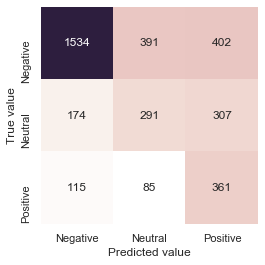

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

labels = ['Negative', 'Neutral', 'Positive']

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cmap=cmap, cbar=False, fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted value')
plt.ylabel('True value');

In [83]:
#pd.DataFrame(tfidf_train, columns=vect.get_feature_names())

## Now try deep learning

In [120]:
# https://github.com/martinpella/twitter-airlines/blob/master/deep_learning.ipynb

from keras.datasets import mnist
from keras import models
from keras import layers

Using TensorFlow backend.


In [126]:
# need to limit input shape so create vocab counter
def update_vocab_counter(row):
    for word in row:
        vocab_counter[word] += 1

In [127]:
import collections

In [128]:
vocab_counter = collections.Counter()
df_clean['tokenized_text'].apply(update_vocab_counter);
vocab = sorted(vocab_counter, key=vocab_counter.get, reverse=True)

In [135]:
len(vocab)

12427

In [136]:
max_words = 5000

In [137]:
# Dictionary that maps each token with their id
w2id = {w:i for i, w in enumerate(vocab[:max_words])}

In [141]:
w2id

{'flight': 0,
 'get': 1,
 'thanks': 2,
 'cancelled': 3,
 'service': 4,
 'help': 5,
 'time': 6,
 'im': 7,
 'customer': 8,
 'us': 9,
 'hours': 10,
 'flights': 11,
 'amp': 12,
 'hold': 13,
 'plane': 14,
 'thank': 15,
 'cant': 16,
 'still': 17,
 'please': 18,
 'one': 19,
 'need': 20,
 'would': 21,
 'delayed': 22,
 'back': 23,
 'gate': 24,
 'flightled': 25,
 'call': 26,
 'dont': 27,
 'bag': 28,
 'got': 29,
 'hour': 30,
 'like': 31,
 'late': 32,
 'phone': 33,
 'today': 34,
 'airline': 35,
 'guys': 36,
 'fly': 37,
 'waiting': 38,
 'know': 39,
 'trying': 40,
 'way': 41,
 'airport': 42,
 'ive': 43,
 'day': 44,
 'great': 45,
 'u': 46,
 'going': 47,
 'wait': 48,
 'never': 49,
 'flying': 50,
 'make': 51,
 'change': 52,
 'go': 53,
 'hrs': 54,
 'last': 55,
 'weather': 56,
 'tomorrow': 57,
 'really': 58,
 'good': 59,
 'delay': 60,
 'minutes': 61,
 'home': 62,
 'even': 63,
 'people': 64,
 'aa': 65,
 'bags': 66,
 'another': 67,
 'seat': 68,
 'want': 69,
 'new': 70,
 'told': 71,
 'take': 72,
 'check': 7